#IA376N

Profa. Dra. Paula D. Paro Costa
Depto. de Eng. de Computação e Automação (DCA)
Faculdade de Engenharia Elétrica e de Computação (FEEC)
paulad@unicamp.br

#Nome dos integrantes da equipe:

*   Byron Alejandro Acuña Acurio. RA: 209428
*   José Carlos Ferreira. RA: 170860

#Trabalho: Síntese de Dados Financeiros para Otimização de Portfólio

## Introdução:

No setor financeiro, o acesso a dados do mundo real para análise e treinamento de modelos é limitado devido a questões de privacidade e segurança. Assim os dados sintéticos podem ajudar a fornecer uma alternativa segura para dispoinibilizar esses dados para diversas organizações.

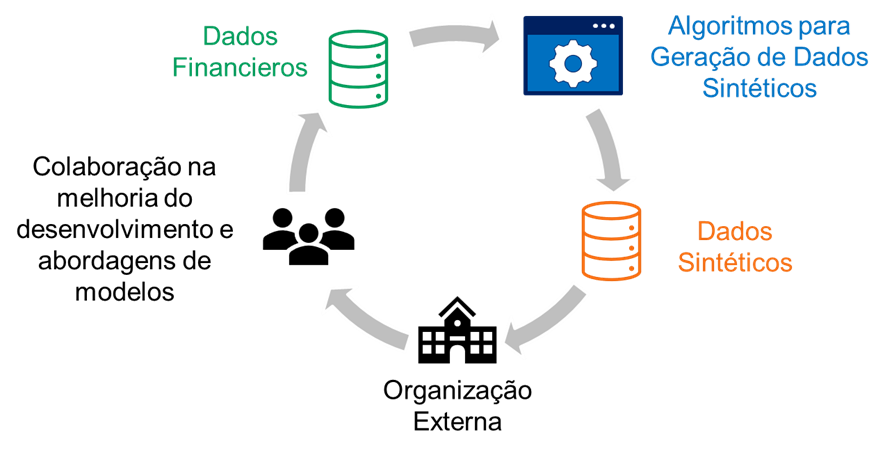

O objetivo é explorar abordagens e desenvolver algoritmos para produzir dados sintéticos financeiros, retendo o máximo de informações estatísticas para permitir o desenvolvimento de modelos de otimização de portfólios e outras aplicações financeiras.

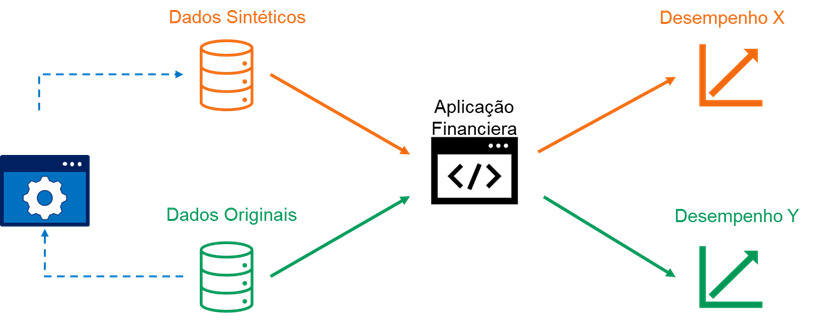

O google colab está estruturado da seguinte forma:
*   Na Seção 1, baixamos os dados necesarios para nossos experimentos
*   Na Seção 2, se encontra o pré-processamento do conjunto de dados brutos.
*   Na Seção 3, desenvolvemos um modelo base GRU.
*  Na Seção 4, desenvolvemos um modelo base LSTM.
*  Na Seção 5, desenvolvemos um modelo base GAN.

# Seção 1: Baixamos os dados nescesarios para os experimentos

**Retornos diários**

Neste trabalho a gente se vai focar nos retornos diários. O retorno diário de uma ação é a mudança percentual no preço de uma ação em um único dia. Ou seja o retorno diário se calcula subtraindo a diferença entre o preço de fechamento da ação em um dia e seu preço de fechamento no dia anterior, dividindo o resultado pelo fechamento do dia anterior e multiplicando por 100.

Por exemplo, se uma ação fecha em 100 dólares na segunda-feira e fecha em 102 dólares na terça-feira, seu retorno diário seria calculado como:

$$
((102-100) \div 100) \times 100=2 \%
$$

Isso mostra que a ação aumentou em valor em 2% ao longo de um dia. Por outro lado, se a ação tivesse fechado a 98 dólares na terça-feira, o retorno diário seria calculado como:

$$
((98-100) \div 100) \times 100=-2 \%
$$

O que significa que o valor das ações diminuiu 2% ao longo de um dia.

Os retornos diários são relevantes para os investidores porque fornecem uma maneira rápida de verificar o desempenho de uma ação em um curto período.

Especificamente neste caso de estudo vamos tentar prever os movimentos de preços da ação da empresa Apple. Para isso, foi usado os preços de fechamento diários (Close) de 1º de julho de 2010 a 30 de junho de 2020. O faixa de tempo dos dados da serie temporal foi seleccionada para testar nossas implementações, com um evento inesperado sem um evento inesperado. Neste estudo, o evento inesperado é a COVID-19 no ano 2020. Então, específicamente foi divido o banco de dados como se detalha a continuação:
*   Sete anos para fins de treinamento
*   Dois anos para fins de validação



# Seção 2: Pré-processamento dos dados

In [1]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math

# Define the URL of the raw CSV file
url = 'https://raw.githubusercontent.com/byronacunia/dgm-2024.2/main/projetos/FinancialDataSynthesis/notebooks/DATA.csv'

## Fazemos a leitura do banco de dados em um dataframe
df = pd.read_csv(url, parse_dates=['Date'])

O movimento do preço das ações é influenciado por muitos fatores. Então se precisa da maior quantidade de informações possíveis.
Por isso no banco de dados criado no arquivo DATA.csv temos alem da serie temporal dos preços de fechamento diários (Close) da empresa Apple, os índices de mercado, preços de commodities e preços de ações de grandes empresas como Amazon, Google e Microsoft. A continuação se explica cada coluna do banco de dados:

## Historico de dados da ação da empressa Apple:

*   **Date:** A data de cada registro (no formato AAAA-MM-DD).
*   **Open:** O preço da ação na abertura no início do dia de negociação.
*   **High:** O preço mais alto atingido durante o dia de negociação.
*   **Low:** O menor preço atingido durante o dia de negociação.
*   **Close:** O preço de fechamento no final do dia de negociação (Este é o valor que desejamos preveer).
*   **Volume:** O volume total de negociações executadas naquele dia.


## Historico de dados dos Índices de ações

*   **NASDAQ:** O Índice que reflete o valor de desempenho de mais de 3.000 empresas de tecnologia e outras empresas voltadas para o crescimento listadas na bolsa NASDAQ.
*   **NYSE:** O Índice NYSE reflete o valor Composto da Bolsa de Valores de Nova York, que acompanha o desempenho de todas as ações listadas na NYSE.
*   **S&P 500:** O Índice S&P 500 reflete o desempenho das 500 maiores empresas do mercado de ações dos EUA, ponderado pela capitalização de mercado.
*   **FTSE100:** O Índice Financial Times Stock Exchange 100, reflete o desempenho das 100 maiores empresas listadas na Bolsa de Valores de Londres por capitalização de mercado.
*   **NIKKEI 225:** O Índice NIKKEI 225 acompanha o desempenho de 225 grandes empresas de capital aberto na Bolsa de Valores de Tóquio.
*   **BSE SENSEX:** O Índice BSE SENSEX (Bombay Stock Exchange Sensitive Index),reflete o desempenho de 30 empresas bem estabelecidas e financeiramente sólidas listadas na Bolsa de Valores de Bombaim, na Índia.
*   **RUSSELL2000:** índice que monitora o desempenho de 2.000 empresas de pequena capitalização no mercado dos EUA.
*   **HENG SENG:** O Índice Hang Seng, refrete as maiores empresas negociadas na Bolsa de Valores de Hong Kong.
*   **SSE:** O Índice SSE (Shanghai Stock Exchange Composite Index) refrete todas as empresas listadas na Bolsa de Valores de Xangai.

## Commodities

*   **Crude Oil:** O preço do petróleo bruto por barril, um indicador-chave dos preços globais da energia.
*   **Gold:** O preço do ouro, frequentemente usado como um ativo de refúgio seguro durante incertezas econômicas.

## Volatilidade do mercado e moeda

*   **VIX:** O Índice de Volatilidade, muitas vezes chamado de "índice de medo", mede o risco de mercado e as expectativas de volatilidade futura.
*   **USD Index:** O Índice USD Index acompanha o valor do dólar americano em relação a uma cesta de moedas estrangeiras, indicando a força do USD.

## Preço de Ações Correlatas:

*   **Amazon:** O preço das ações da Amazon.com, Inc. naquele dia.
*   **Google:** O preço das ações da Alphabet Inc. (empresa do Google) naquele dia.
*   **Microsoft:** O preço das ações da Microsoft Corporation naquele dia.

In [2]:
df

,Date,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,...,RUSSELL2000,HENG SENG,SSE,Crude Oil,Gold,VIX,USD index,Amazon,Google,Microsoft
0,2010-07-01,9.082143,9.100000,8.686429,8.874286,1022896000,2101.360107,6462.029785,1027.369995,4805.75,...,604.760010,NaN,2373.791992,72.949997,1206.300049,32.860001,84.72,110.959999,110.959999,23.160000
1,2010-07-02,8.946072,8.961785,8.685715,8.819285,693842800,2091.790039,6434.810059,1022.580017,4838.09,...,598.969971,19905.32031,2382.900879,72.139999,1207.400024,30.120001,84.43,109.139999,109.139999,23.270000
2,2010-07-06,8.964286,9.028571,8.791429,8.879642,615235600,2093.879883,6486.089844,1028.060059,4965.00,...,590.030029,20084.11914,2409.424072,71.980003,1194.800049,29.650000,84.08,110.059998,110.059998,23.820000
3,2010-07-07,8.946072,9.241786,8.919642,9.238214,654556000,2159.469971,6685.779785,1060.270020,5014.82,...,611.659973,19857.07031,2421.116943,74.070000,1198.599976,26.840000,83.82,113.430000,113.430000,24.299999
4,2010-07-08,9.374286,9.389286,9.103214,9.217500,738144400,2175.399902,6755.810059,1070.250000,5105.45,...,620.270020,20050.56055,2415.149902,75.440002,1195.800049,25.709999,83.82,116.220001,116.220001,24.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2020-06-24,91.250000,92.197502,89.629997,90.014999,192623200,9909.169922,11726.540040,3050.330078,6123.69,...,1389.739990,24781.58008,2979.551025,38.009998,1765.800049,33.840000,97.15,2734.399902,2734.399902,197.839996
2513,2020-06-25,90.175003,91.250000,89.392502,91.209999,137522400,10017.000000,11865.110350,3083.760010,6147.14,...,1413.310059,NaN,NaN,38.720001,1762.099976,32.220001,97.43,2754.580078,2754.580078,200.339996
2514,2020-06-26,91.102501,91.330002,88.254997,88.407501,205256800,9757.219727,11604.429690,3009.050049,6159.30,...,1378.780029,24549.99023,NaN,38.490002,1772.500000,34.730000,97.43,2692.870117,2692.870117,196.330002
2515,2020-06-29,88.312500,90.542503,87.820000,90.445000,130646000,9874.150391,11777.080080,3053.239990,6225.77,...,1421.209961,24301.27930,2961.516113,39.700001,1774.800049,31.780001,97.54,2680.379883,2680.379883,198.440002


In [3]:
df.shape

(2517, 22)

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'NASDAQ ', 'NYSE ',
       'S&P 500', 'FTSE100', 'NIKKI225', 'BSE SENSEX', 'RUSSELL2000',
       'HENG SENG', 'SSE', 'Crude Oil', 'Gold', 'VIX', 'USD index', 'Amazon',
       'Google', 'Microsoft'],
      dtype='object')

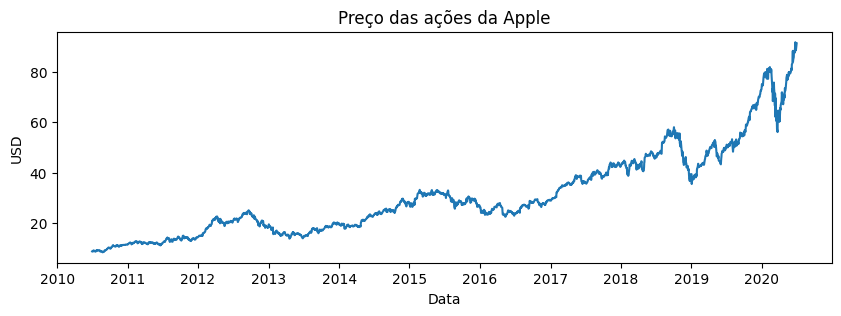

In [5]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(df['Date'], df['Close'], label='Apple stock')
ax.set(xlabel="Data",
       ylabel="USD",
       title="Preço das ações da Apple")
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
plt.show()

## Criação de Características Baseadas em Indicadores Técnicos

Muitos traders e investidores avaliam ações e outros ativos com base em dados históricos de preço e volume. É uma abordagem usada para identificar tendências, ou ausência de tendências, e ajudar aos traders e investidores a tomar decisões com base no que eles acreditam que serão os movimentos de preços futuros. A suposição subjacente da análise técnica é que padrões passados ​​e movimentos de preços tendem a se repetir, então eles podem ser usados ​​para prever movimentos futuros. Portanto, analistas técnicos examinam gráficos e procuram oportunidades em padrões e indicadores. Para que o modelo generativo possa fazer algo similar, neste trabalho a gente fez o calculo de algums indicadores técnicos explicados a continuação.

Os indicadores técnicos são basicamente cálculos estatísticos baseados em preço e volume que podem fornecer informações adicionais sobre tendências e oportunidades potenciais. Alguns dos indicadores mais comumente usados ​na análise técnica incluem médias móveis, índice de força relativa (RSI), Bandas de Bollinger e muitos outros.

Apesar de sua popularidade entre os traders, o uso da análise técnica pode ser controverso. Alguns críticos argumentam que a análise técnica depende muito de interpretações subjetivas de padrões de gráficos e que ela não tem uma base teórica clara. Eles também argumentam que a análise técnica é propensa a sinais falsos e que os traders que confiam na análise técnica podem perder fatores fundamentais importantes que podem influenciar o preço das ações.

A análise fundamental, por outro lado, foca na análise dos fundamentos financeiros e econômicos de uma empresa, como receita, lucros e participação de mercado. Diferentemente da análise técnica, a análise fundamental é baseada na crença de que o valor intrínseco de uma empresa pode ser determinado pela análise desses fatores. Analistas fundamentais olham para demonstrações financeiras, tendências do setor e outros dados relevantes para tomar decisões de investimento.

Também pode ser dito que, enquanto os humanos tendem a operar melhor com análise fundamental, pois requer um profundo entendimento dos fatores subjacentes que impulsionam o valor de uma empresa, os computadores podem operar melhor com análise técnica, pois ela depende muito de dados quantitativos que podem ser analisados ​​de forma rápida e eficiente. Uma evidência disso é o fato de que o uso de bots de negociação automatizados que negociam com base em análise técnica se tornou cada vez mais popular nos últimos anos. Esses bots usam algoritmos para identificar padrões e tendências em dados de preços e fazem negociações com base em sinais técnicos.

Há uma ampla gama de indicadores técnicos usados ​​por traders e investidores, cada um com seu próprio conjunto único de benefícios e desvantagens. Alguns dos indicadores mais comumente usados ​​incluem médias móveis, que podem ser simples ou exponenciais, bem como Bandas de Bollinger, RSI, ATR, volatilidade histórica e muitos outros.

Neste trabalho a continuação foi calculado os seguintes indicadores técnicos:

### Médias móveis simples

As médias móveis são comumente usadas para suavizar flutuações de preços e identificar tendências na ação de preços de ações, commodities, câmbio, criptomoedas e muitos outros.

Uma média móvel é calculada tomando o preço médio de um ativo em um certo período de tempo. Este período pode ser de sete dias ou de até 200 dias, dependendo da preferência do trader e do ativo que está sendo analisado. A linha resultante que representa a média móvel é então plotada em um gráfico, e os traders usam esta linha para avaliar a direção e a força da tendência

Os traders geralmente usam médias móveis para identificar níveis dinâmicos de suporte e resistência, bem como para detectar potenciais mudanças de tendência. Quando o preço de um ativo está acima de sua média móvel, ele é considerado uma tendência de alta, enquanto um preço abaixo da média móvel é considerado uma tendência de baixa. Os traders também procuram cruzamentos entre diferentes médias móveis, o que pode sinalizar uma mudança na direção da tendência, como a Golden Cross (quando a média móvel de 50 dias cruza acima da média móvel de 200 dias) e a Death Cross (quando a média móvel de 50 dias cruza abaixo da média móvel de 200 dias).

As médias móveis também podem ser usadas para definir níveis de stop loss e take profit para negociações. Por exemplo, um trader pode colocar uma ordem de stop loss abaixo da média móvel para limitar suas perdas se a tendência se reverter.

Para passar essas informações para nosso modelo generativo com o objetivo de suavizar os dados de preços para identificar tendências em diferentes períodos de tempo neste trabalho foi calculado as seguintes médias móveis simples

*   **MA7:** Média móvel de 7 dias do preço de fechamento das ações da Apple refere-se à coluna "Close",
*   **MA20:** Média móvel de 20 dias do preço de fechamento das ações da Apple refere-se à coluna "Close",

### Moving Average Convergence Divergence (MACD)

O indicador técnico MACD é calculado pela diferença entre a média móvel exponencial (MME) de 26 dias da coluna "Close" e a MME de 12 dias da coluna "Open".

O indicador técnico MACD identifica o momentum e direção de tendência comparando dois MMEs. Um MACD positivo sugere momentum de alta, enquanto um MACD negativo indica momentum de baixa.

###  Bollinger Bands

As Bandas de Bollinger são uma ferramenta extremamente popular usada por traders e analistas para medir a volatilidade e identificar potenciais oportunidades de compra e venda.

As Bandas de Bollinger consistem em três linhas em um gráfico: uma média móvel simples (SMA) no meio, tipicamente uma média móvel de 20 dias, e duas bandas que são definidas a uma distância de dois desvios-padrão da SMA. Quando o mercado está volátil, as bandas se alargam, e quando o mercado está menos volátil, as bandas se contraem. A distância entre as bandas pode, portanto, ser usada como um indicador de volatilidade.

Geralmente, os traders usam essas bandas para identificar possíveis entradas de compra e venda. Quando o preço toca ou cruza abaixo da banda inferior, pode ser considerado sobrevendido e um sinal potencial de compra. Por outro lado, quando o preço toca ou cruza acima da banda superior, pode ser considerado sobrecomprado e um sinal potencial de venda.

Para obter os valores das Bandas de Bollinger, foi feito as seguintes três etapas importantes:

*   Calculamos a média móvil simples de 20 dias do preço da ação (MA20).
*   Calculamos o desvio padrão do preço das ações nos últimos 21 períodos ($\sigma$).
*   Calcule as bandas superior e inferior adicionando ou subtraindo dois desvios padrão da média móvil simples de 20 dias do preço da ação (MA20).



A fórmula para calcular a banda superior é:

$$
\text { Upper Band }=\text { MA20 }+(2 \times \sigma)
$$

Enquanto a fórmula para a banda inferior é:

$$
\text { Lower Band }=\text { MA20 }+(2 \times \sigma)
$$

Se os preços se moven perto ou fora das Bandas de Bollinger sugerem possíveis condições de sobrecompra ou sobrevenda.

### Média Móvel Exponencial (EMA)

EMA, por outro lado, dá mais peso à ação de preço recente. A fórmula para calcular EMA envolve usar um multiplicador que dá mais peso aos dados de preço mais recentes. Ou seja o indicador técnico EMA reage mais rapidamente às mudanças de preço em comparação com as média móveis simples MA7 e MA20, isso é útil para identificar tendências. A fórmula para calcular uma EMA de 2 dias, neste trabalho é:

$$
\text {EMA}_t=\left(\text { Close }_t-\text {EMA}_{t-1}\right) \times \text { Multiplier }+\text {EMA}_{t-1}
$$


Onde:

*   $\text {EMA}_t :$ é a média móvel exponencial que desejamos calcular
*   $\text { Close }_t:$ Preço de fechamento do dia atual.
*   $\text {EMA}_{t-1}:$ é a média móvel exponencial do dia anterior. Então como EMA é calculado iterativamente, se inicia com o primeiro valor da coluna "Close" como a EMA inicial do $\text {EMA}_{t-1}$.
*   $\text { Multiplier } =\frac{1}{\operatorname{com}+1}$



$\operatorname{com}$ do ingles (center of mass) é o fator de suavização

O $\text { Multiplier } $ pode ser definido em função de número de días
*   $\text { Multiplier } =\frac{2}{\operatorname{N}+1}$

Assim podemos encontrar que para o centro de massa = 0.5 definido neste trabalho, estamos trabalhando com uma Média Móvel Exponencial (EMA) de dois días.

### Log Momentum

A gente também calculo o logaritmo dos preço de fechamento (Close), com o objetivo de enfatizar mudanças percentuais em relação aos valores brutos.

In [6]:
# Função para calcular os indicadores técnicos
def get_technical_indicators(data):
    # Código para criar uma média móvel de 7 dias
    data['MA7'] = data.iloc[:,4].rolling(window=7).mean()
    # Código para criar uma média móvel de 20 dias
    data['MA20'] = data.iloc[:,4].rolling(window=20).mean()

    # Código para criar Moving Average Convergence Divergence (MACD)
    data['MACD'] = data.iloc[:,4].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()

    # Código para criar as Bandas de Bollinger
    data['20SD'] = data.iloc[:, 4].rolling(20).std()
    data['upper_band'] = data['MA20'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA20'] - (data['20SD'] * 2)

    # Código para criar uma Exponential moving average
    data['EMA'] = data.iloc[:,4].ewm(com=0.5).mean()

    # Create LogMomentum
    data['logmomentum'] = np.log(data.iloc[:,4] - 1)

    return data
T_df = get_technical_indicators(df)

In [7]:
T_df

,Date,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,...,Google,Microsoft,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2010-07-01,9.082143,9.100000,8.686429,8.874286,1022896000,2101.360107,6462.029785,1027.369995,4805.75,...,110.959999,23.160000,NaN,NaN,-0.207857,NaN,NaN,NaN,8.874286,2.063603
1,2010-07-02,8.946072,8.961785,8.685715,8.819285,693842800,2091.790039,6434.810059,1022.580017,4838.09,...,109.139999,23.270000,NaN,NaN,-0.215481,NaN,NaN,NaN,8.833035,2.056593
2,2010-07-06,8.964286,9.028571,8.791429,8.879642,615235600,2093.879883,6486.089844,1028.060059,4965.00,...,110.059998,23.820000,NaN,NaN,-0.188385,NaN,NaN,NaN,8.865301,2.064282
3,2010-07-07,8.946072,9.241786,8.919642,9.238214,654556000,2159.469971,6685.779785,1060.270020,5014.82,...,113.430000,24.299999,NaN,NaN,-0.066650,NaN,NaN,NaN,9.117017,2.108784
4,2010-07-08,9.374286,9.389286,9.103214,9.217500,738144400,2175.399902,6755.810059,1070.250000,5105.45,...,116.220001,24.410000,NaN,NaN,-0.060747,NaN,NaN,NaN,9.184283,2.106266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2020-06-24,91.250000,92.197502,89.629997,90.014999,192623200,9909.169922,11726.540040,3050.330078,6123.69,...,2734.399902,197.839996,88.949285,84.985999,-3.282695,3.803678,92.593356,77.378643,90.261712,4.488805
2513,2020-06-25,90.175003,91.250000,89.392502,91.209999,137522400,10017.000000,11865.110350,3083.760010,6147.14,...,2754.580078,200.339996,89.405000,85.568374,-3.181169,3.821215,93.210804,77.925945,90.893903,4.502140
2514,2020-06-26,91.102501,91.330002,88.254997,88.407501,205256800,9757.219727,11604.429690,3009.050049,6159.30,...,2692.870117,196.330002,89.477857,86.014499,-3.403862,3.587292,93.189084,78.839915,89.236302,4.470581
2515,2020-06-29,88.312500,90.542503,87.820000,90.445000,130646000,9874.150391,11777.080080,3053.239990,6225.77,...,2680.379883,198.440002,89.836785,86.513624,-2.990102,3.466583,93.446791,79.580458,90.042101,4.493624


Por causa da média móvil simples tem valores NAN nas 20 primeiras linhas das features 20SD, upper_band, lower_band. Assim a continuação vamos a tirar essas linhas

In [8]:
#Código para tirar as 20 primeiras linhas.
dataset = T_df.iloc[20:,:].reset_index(drop=True)

In [9]:
dataset

,Date,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,...,Google,Microsoft,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2010-07-30,9.138928,9.275000,9.103572,9.187500,448210000,2254.699951,6998.990234,1101.599976,5258.02,...,117.889999,25.809999,9.278775,9.116911,-0.050225,0.182885,9.482681,8.751140,9.211011,2.102609
1,2010-08-02,9.301429,9.378214,9.272142,9.351786,428055600,2295.360107,7174.899902,1125.859985,5397.11,...,120.070000,26.330000,9.293214,9.143536,-0.047484,0.175904,9.495343,8.791728,9.304861,2.122475
2,2010-08-03,9.321786,9.402143,9.265000,9.354643,417653600,2283.520020,7146.990234,1120.459961,5396.48,...,122.419998,26.160000,9.303367,9.167286,-0.047158,0.170378,9.508042,8.826529,9.338049,2.122817
3,2010-08-04,9.387143,9.438571,9.296785,9.392143,420375200,2303.570068,7182.140137,1127.239990,5386.16,...,127.580002,25.730000,9.322245,9.174982,-0.052793,0.177095,9.529172,8.820792,9.374112,2.127296
4,2010-08-05,9.347500,9.399285,9.305357,9.346429,289097200,2293.060059,7174.270020,1125.810059,5365.78,...,127.830002,25.370001,9.310102,9.181429,-0.054453,0.181027,9.543483,8.819374,9.355657,2.121834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,2020-06-24,91.250000,92.197502,89.629997,90.014999,192623200,9909.169922,11726.540040,3050.330078,6123.69,...,2734.399902,197.839996,88.949285,84.985999,-3.282695,3.803678,92.593356,77.378643,90.261712,4.488805
2493,2020-06-25,90.175003,91.250000,89.392502,91.209999,137522400,10017.000000,11865.110350,3083.760010,6147.14,...,2754.580078,200.339996,89.405000,85.568374,-3.181169,3.821215,93.210804,77.925945,90.893903,4.502140
2494,2020-06-26,91.102501,91.330002,88.254997,88.407501,205256800,9757.219727,11604.429690,3009.050049,6159.30,...,2692.870117,196.330002,89.477857,86.014499,-3.403862,3.587292,93.189084,78.839915,89.236302,4.470581
2495,2020-06-29,88.312500,90.542503,87.820000,90.445000,130646000,9874.150391,11777.080080,3053.239990,6225.77,...,2680.379883,198.440002,89.836785,86.513624,-2.990102,3.466583,93.446791,79.580458,90.042101,4.493624


### Transformada de Fourier do Preço das ações da Apple

Para poder passar informações periódicas com frequencias dominantes a gente calculou a transformada discreta de fourier do preço das ações da Apple, assim a gente calculou a magnitude e a phase dos componentes de fourier 3, 6, 9

In [10]:
#Código para obter as componentes de Fourier 3, 6, 9
def get_fourier_transfer(dataset):
    data_FT = dataset[['Date', 'Close']]

    close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
    fft_df = pd.DataFrame({'fft': close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

    fft_list = np.asarray(fft_df['fft'].tolist())
    fft_com_df = pd.DataFrame()
    for num_ in [3, 6, 9]:
        fft_list_m10 = np.copy(fft_list);
        fft_list_m10[num_:-num_] = 0
        fft_ = np.fft.ifft(fft_list_m10)
        fft_com = pd.DataFrame({'fft': fft_})
        fft_com['absolute of ' + str(num_) + ' comp'] = fft_com['fft'].apply(lambda x: np.abs(x))
        fft_com['angle of ' + str(num_) + ' comp'] = fft_com['fft'].apply(lambda x: np.angle(x))
        fft_com = fft_com.drop(columns='fft')
        fft_com_df = pd.concat([fft_com_df, fft_com], axis=1)

    return fft_com_df

A continuação obtemos o dataset final que vamos utilizar nos experimentos neste google colab

In [11]:
#Criação das características baseadas em Transformada de Fourier
dataset_F = get_fourier_transfer(dataset)
Final_data = pd.concat([dataset, dataset_F], axis=1)

In [12]:
Final_data.to_csv("Finaldata_with_Fourier.csv", index=False)

In [13]:
Final_data

,Date,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,...,upper_band,lower_band,EMA,logmomentum,absolute of 3 comp,angle of 3 comp,absolute of 6 comp,angle of 6 comp,absolute of 9 comp,angle of 9 comp
0,2010-07-30,9.138928,9.275000,9.103572,9.187500,448210000,2254.699951,6998.990234,1101.599976,5258.02,...,9.482681,8.751140,9.211011,2.102609,39.394969,-0.057979,45.061101,-0.046991,43.584984,-0.024837
1,2010-08-02,9.301429,9.378214,9.272142,9.351786,428055600,2295.360107,7174.899902,1125.859985,5397.11,...,9.495343,8.791728,9.304861,2.122475,39.295065,-0.058099,44.783613,-0.047516,43.114605,-0.025025
2,2010-08-03,9.321786,9.402143,9.265000,9.354643,417653600,2283.520020,7146.990234,1120.459961,5396.48,...,9.508042,8.826529,9.338049,2.122817,39.195068,-0.058217,44.505289,-0.048036,42.644095,-0.025205
3,2010-08-04,9.387143,9.438571,9.296785,9.392143,420375200,2303.570068,7182.140137,1127.239990,5386.16,...,9.529172,8.820792,9.374112,2.127296,39.094981,-0.058333,44.226155,-0.048554,42.173551,-0.025375
4,2010-08-05,9.347500,9.399285,9.305357,9.346429,289097200,2293.060059,7174.270020,1125.810059,5365.78,...,9.543483,8.819374,9.355657,2.121834,38.994805,-0.058446,43.946237,-0.049067,41.703066,-0.025536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,2020-06-24,91.250000,92.197502,89.629997,90.014999,192623200,9909.169922,11726.540040,3050.330078,6123.69,...,92.593356,77.378643,90.261712,4.488805,39.893013,-0.057338,46.435074,-0.044323,45.931594,-0.023775
2493,2020-06-25,90.175003,91.250000,89.392502,91.209999,137522400,10017.000000,11865.110350,3083.760010,6147.14,...,93.210804,77.925945,90.893903,4.502140,39.793609,-0.057471,46.162162,-0.044862,45.463296,-0.024003
2494,2020-06-26,91.102501,91.330002,88.254997,88.407501,205256800,9757.219727,11604.429690,3009.050049,6159.30,...,93.189084,78.839915,89.236302,4.470581,39.694100,-0.057602,45.888283,-0.045399,44.994390,-0.024223
2495,2020-06-29,88.312500,90.542503,87.820000,90.445000,130646000,9874.150391,11777.080080,3053.239990,6225.77,...,93.446791,79.580458,90.042101,4.493624,39.594489,-0.057730,45.613462,-0.045933,44.524973,-0.024436


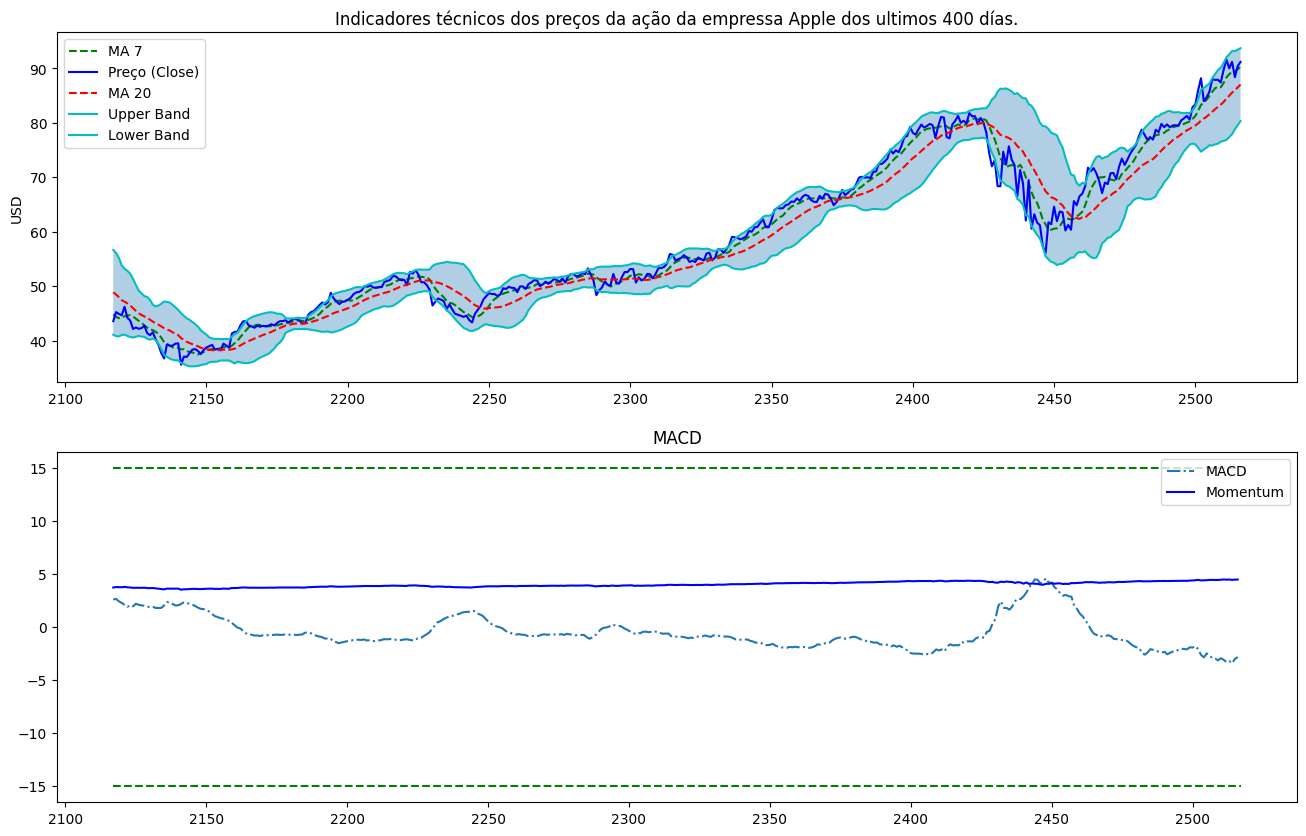

In [14]:
def plot_technical_indicators(dataset, last_days):
       plt.figure(figsize=(16, 10), dpi=100)
       shape_0 = dataset.shape[0]
       xmacd_ = shape_0 - last_days

       dataset = dataset.iloc[-last_days:, :]
       x_ = range(3, dataset.shape[0])
       x_ = list(dataset.index)

       # Plot first subplot
       plt.subplot(2, 1, 1)
       plt.plot(dataset['MA7'], label='MA 7', color='g', linestyle='--')
       plt.plot(dataset['Close'], label='Preço (Close)', color='b')
       plt.plot(dataset['MA20'], label='MA 20', color='r', linestyle='--')
       plt.plot(dataset['upper_band'], label='Upper Band', color='c')
       plt.plot(dataset['lower_band'], label='Lower Band', color='c')
       plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
       plt.title('Indicadores técnicos dos preços da ação da empressa Apple dos ultimos {} días.'.format(last_days))
       plt.ylabel('USD')
       plt.legend()

       # Plot second subplot
       plt.subplot(2, 1, 2)
       plt.title('MACD')
       plt.plot(dataset['MACD'], label='MACD', linestyle='-.')
       plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
       plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
       plt.plot(dataset['logmomentum'], label='Momentum', color='b', linestyle='-')

       plt.legend()
       plt.show()

plot_technical_indicators(T_df, 400)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


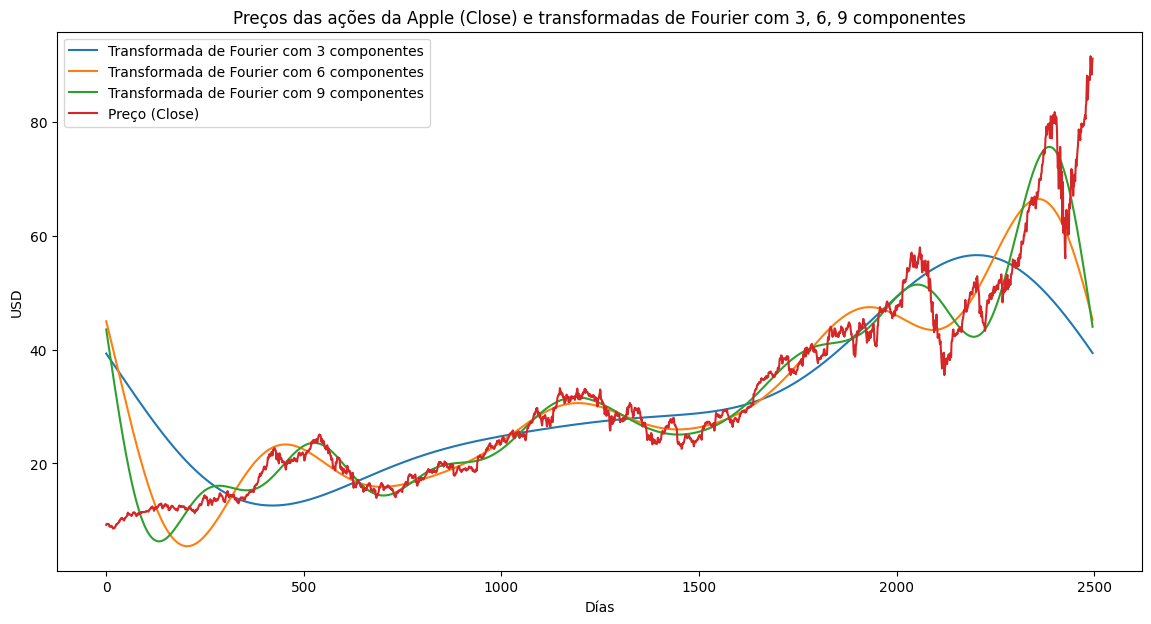

In [15]:
def plot_Fourier(dataset):
    data_FT = dataset[['Date', 'Close']]

    close_fft = np.fft.fft(np.asarray(data_FT['Close'].tolist()))
    fft_df = pd.DataFrame({'fft': close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

    fft_list = np.asarray(fft_df['fft'].tolist())
    plt.figure(figsize=(14, 7), dpi=100)
    fft_list = np.asarray(fft_df['fft'].tolist())
    for num_ in [3, 6, 9]:
        fft_list_m10 = np.copy(fft_list);
        fft_list_m10[num_:-num_] = 0
        plt.plot(np.fft.ifft(fft_list_m10), label='Transformada de Fourier com {} componentes'.format(num_))
    plt.plot(data_FT['Close'], label='Preço (Close)')
    plt.xlabel('Días')
    plt.ylabel('USD')
    plt.title('Preços das ações da Apple (Close) e transformadas de Fourier com 3, 6, 9 componentes')
    plt.legend()
    plt.show()

plot_Fourier(dataset)

In [16]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

In [18]:
# %% --------------------------------------- Load Dataset Final com Features  -----------------------------------------------------------------
dataset = pd.read_csv('Finaldata_with_Fourier.csv', parse_dates=['Date'])
url2 = "https://raw.githubusercontent.com/byronacunia/dgm-2024.2/main/projetos/FinancialDataSynthesis/notebooks/News.csv"
news = pd.read_csv(url2, parse_dates=["Date"])

## Imputação de Dados Faltantes

A continuação foi feito as seguintes manipulações dos dados:
*   Foi remplaado todos os valores zero no conjunto de dados por NaN (Not a Number).
*   Se adicionou um score de noticias do Finbert para analizar as noticias entre positivas, neutral ou negativas com um score entre -1 até 1
*   Se fez a imputação dos valores ausentes usando a última observação válida (forward-fill).
*   Se fez a imputação dos valores ausentes usando a última observação válida (forward-fill).
*   Se fez a combinação dos dados preenchidos para frente e para trás e calcula a média de cada linha.

In [19]:
# Código para remplazar todos os valores zero no conjunto de dados por NaN (Not a Number)
dataset.replace(0, np.nan, inplace=True)
dataset.to_csv("dataset.csv", index=False)
# Código para adicionar o análise de sentimento de notícias
dataset["News"] = news["Score"]

# Código para verificar se existem dados NaN (Not a Number)
dataset.isnull().sum()
# Código para Fazer a imputação dos dados NaN
dataset.iloc[:, 1:] = pd.concat([dataset.iloc[:, 1:].ffill(), dataset.iloc[:, 1:].bfill()]).groupby(level=0).mean()

<ipython-input-19-960af82f0ef1>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       448210000.0
1       428055600.0
2       417653600.0
3       420375200.0
4       289097200.0
           ...     
2492    192623200.0
2493    137522400.0
2494    205256800.0
2495    130646000.0
2496    140223200.0
Name: Volume, Length: 2497, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.iloc[:, 1:] = pd.concat([dataset.iloc[:, 1:].ffill(), dataset.iloc[:, 1:].bfill()]).groupby(level=0).mean()


A continuação colocamos no index a data de cada registro, ordenado em forma acendente

In [ ]:
# Código para colocar no index a data de cada registro, ordenado em forma acendente
datetime_series = pd.to_datetime(dataset['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='Date')
dataset = dataset.drop(columns='Date')

In [ ]:
dataset

,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,NIKKI225,...,lower_band,EMA,logmomentum,absolute of 3 comp,angle of 3 comp,absolute of 6 comp,angle of 6 comp,absolute of 9 comp,angle of 9 comp,News
2010-07-30,9.138928,9.275000,9.103572,9.187500,448210000.0,2254.699951,6998.990234,1101.599976,5258.02,9537.299805,...,8.751140,9.211011,2.102609,39.394969,-0.057979,45.061101,-0.046991,43.584984,-0.024837,0.090936
2010-08-02,9.301429,9.378214,9.272142,9.351786,428055600.0,2295.360107,7174.899902,1125.859985,5397.11,9570.309570,...,8.791728,9.304861,2.122475,39.295065,-0.058099,44.783613,-0.047516,43.114605,-0.025025,0.090936
2010-08-03,9.321786,9.402143,9.265000,9.354643,417653600.0,2283.520020,7146.990234,1120.459961,5396.48,9694.009766,...,8.826529,9.338049,2.122817,39.195068,-0.058217,44.505289,-0.048036,42.644095,-0.025205,0.052680
2010-08-04,9.387143,9.438571,9.296785,9.392143,420375200.0,2303.570068,7182.140137,1127.239990,5386.16,9489.339844,...,8.820792,9.374112,2.127296,39.094981,-0.058333,44.226155,-0.048554,42.173551,-0.025375,-0.959830
2010-08-05,9.347500,9.399285,9.305357,9.346429,289097200.0,2293.060059,7174.270020,1125.810059,5365.78,9653.919922,...,8.819374,9.355657,2.121834,38.994805,-0.058446,43.946237,-0.049067,41.703066,-0.025536,0.066599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,91.250000,92.197502,89.629997,90.014999,192623200.0,9909.169922,11726.540040,3050.330078,6123.69,22534.320310,...,77.378643,90.261712,4.488805,39.893013,-0.057338,46.435074,-0.044323,45.931594,-0.023775,-0.206868
2020-06-25,90.175003,91.250000,89.392502,91.209999,137522400.0,10017.000000,11865.110350,3083.760010,6147.14,22259.789060,...,77.925945,90.893903,4.502140,39.793609,-0.057471,46.162162,-0.044862,45.463296,-0.024003,0.192572
2020-06-26,91.102501,91.330002,88.254997,88.407501,205256800.0,9757.219727,11604.429690,3009.050049,6159.30,22512.080080,...,78.839915,89.236302,4.470581,39.694100,-0.057602,45.888283,-0.045399,44.994390,-0.024223,0.145926
2020-06-29,88.312500,90.542503,87.820000,90.445000,130646000.0,9874.150391,11777.080080,3053.239990,6225.77,21995.039060,...,79.580458,90.042101,4.493624,39.594489,-0.057730,45.613462,-0.045933,44.524973,-0.024436,0.099280


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'NASDAQ ', 'NYSE ',
       'S&P 500', 'FTSE100', 'NIKKI225', 'BSE SENSEX', 'RUSSELL2000',
       'HENG SENG', 'SSE', 'Crude Oil', 'Gold', 'VIX', 'USD index', 'Amazon',
       'Google', 'Microsoft', 'MA7', 'MA20', 'MACD', '20SD', 'upper_band',
       'lower_band', 'EMA', 'logmomentum', 'absolute of 3 comp',
       'angle of 3 comp', 'absolute of 6 comp', 'angle of 6 comp',
       'absolute of 9 comp', 'angle of 9 comp', 'News'],
      dtype='object')


<ipython-input-16-370c3d7329cc>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       448210000.0
1       428055600.0
2       417653600.0
3       420375200.0
4       289097200.0
           ...     
2492    192623200.0
2493    137522400.0
2494    205256800.0
2495    130646000.0
2496    140223200.0
Name: Volume, Length: 2497, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.iloc[:, 1:] = pd.concat([dataset.iloc[:, 1:].ffill(), dataset.iloc[:, 1:].bfill()]).groupby(level=0).mean()


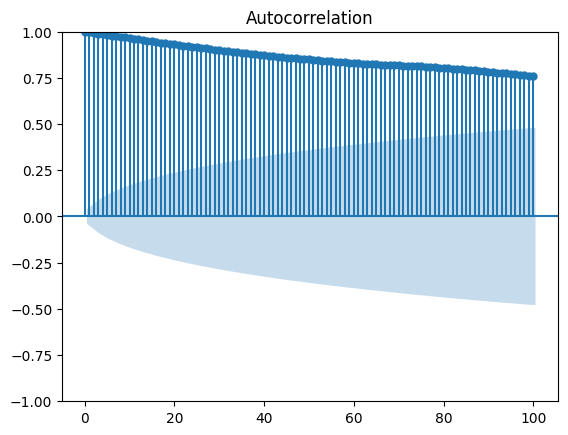

X shape:  (2494, 3, 36)
y shape:  (2494, 1)
X_train shape:  (1746, 3, 36)
y_train shape:  (1746, 1)
y_c_train shape:  (1746, 3, 1)
X_test shape:  (748, 3, 36)
y_test shape:  (748, 1)
y_c_test shape:  (748, 3, 1)
index_train shape: (1746,)
index_test shape: (748,)


In [ ]:
# Get features and target
X_value = pd.DataFrame(dataset.iloc[:, :])
y_value = pd.DataFrame(dataset.iloc[:, 3])

# Autocorrelation Check
sm.graphics.tsa.plot_acf(y_value.squeeze(), lags=100)
plt.show()

# Normalized the data
X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaler.fit(X_value)
y_scaler.fit(y_value)

X_scale_dataset = X_scaler.fit_transform(X_value)
y_scale_dataset = y_scaler.fit_transform(y_value)

dump(X_scaler, open('X_scaler.pkl', 'wb'))
dump(y_scaler, open('y_scaler.pkl', 'wb'))

# Reshape the data
'''Set the data input steps and output steps,
    we use 30 days data to predict 1 day price here,
    reshape it to (None, input_step, number of features) used for LSTM input'''
n_steps_in = 3
n_features = X_value.shape[1]
n_steps_out = 1

# Get X/y dataset
def get_X_y(X_data, y_data):
    X = list()
    y = list()
    yc = list()

    length = len(X_data)
    for i in range(0, length, 1):
        X_value = X_data[i: i + n_steps_in][:, :]
        y_value = y_data[i + n_steps_in: i + (n_steps_in + n_steps_out)][:, 0]
        yc_value = y_data[i: i + n_steps_in][:, :]
        if len(X_value) == 3 and len(y_value) == 1:
            X.append(X_value)
            y.append(y_value)
            yc.append(yc_value)

    return np.array(X), np.array(y), np.array(yc)

# get the train test predict index
def predict_index(dataset, X_train, n_steps_in, n_steps_out):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[n_steps_in : X_train.shape[0] + n_steps_in + n_steps_out - 1, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + n_steps_in:, :].index

    return train_predict_index, test_predict_index

# Split train/test dataset
def split_train_test(data):
    train_size = round(len(X) * 0.7)
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

# Get data and check shape
X, y, yc = get_X_y(X_scale_dataset, y_scale_dataset)
X_train, X_test, = split_train_test(X)
y_train, y_test, = split_train_test(y)
yc_train, yc_test, = split_train_test(yc)
index_train, index_test, = predict_index(dataset, X_train, n_steps_in, n_steps_out)
# %% --------------------------------------- Save dataset -----------------------------------------------------------------
print('X shape: ', X.shape)
print('y shape: ', y.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('y_c_train shape: ', yc_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('y_c_test shape: ', yc_test.shape)
print('index_train shape:', index_train.shape)
print('index_test shape:', index_test.shape)

np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)
np.save("yc_train.npy", yc_train)
np.save("yc_test.npy", yc_test)
np.save('index_train.npy', index_train)
np.save('index_test.npy', index_test)


In [ ]:
dataset

,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,NIKKI225,...,lower_band,EMA,logmomentum,absolute of 3 comp,angle of 3 comp,absolute of 6 comp,angle of 6 comp,absolute of 9 comp,angle of 9 comp,News
2010-07-30,9.138928,9.275000,9.103572,9.187500,448210000.0,2254.699951,6998.990234,1101.599976,5258.02,9537.299805,...,8.751140,9.211011,2.102609,39.394969,-0.057979,45.061101,-0.046991,43.584984,-0.024837,0.090936
2010-08-02,9.301429,9.378214,9.272142,9.351786,428055600.0,2295.360107,7174.899902,1125.859985,5397.11,9570.309570,...,8.791728,9.304861,2.122475,39.295065,-0.058099,44.783613,-0.047516,43.114605,-0.025025,0.090936
2010-08-03,9.321786,9.402143,9.265000,9.354643,417653600.0,2283.520020,7146.990234,1120.459961,5396.48,9694.009766,...,8.826529,9.338049,2.122817,39.195068,-0.058217,44.505289,-0.048036,42.644095,-0.025205,0.052680
2010-08-04,9.387143,9.438571,9.296785,9.392143,420375200.0,2303.570068,7182.140137,1127.239990,5386.16,9489.339844,...,8.820792,9.374112,2.127296,39.094981,-0.058333,44.226155,-0.048554,42.173551,-0.025375,-0.959830
2010-08-05,9.347500,9.399285,9.305357,9.346429,289097200.0,2293.060059,7174.270020,1125.810059,5365.78,9653.919922,...,8.819374,9.355657,2.121834,38.994805,-0.058446,43.946237,-0.049067,41.703066,-0.025536,0.066599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,91.250000,92.197502,89.629997,90.014999,192623200.0,9909.169922,11726.540040,3050.330078,6123.69,22534.320310,...,77.378643,90.261712,4.488805,39.893013,-0.057338,46.435074,-0.044323,45.931594,-0.023775,-0.206868
2020-06-25,90.175003,91.250000,89.392502,91.209999,137522400.0,10017.000000,11865.110350,3083.760010,6147.14,22259.789060,...,77.925945,90.893903,4.502140,39.793609,-0.057471,46.162162,-0.044862,45.463296,-0.024003,0.192572
2020-06-26,91.102501,91.330002,88.254997,88.407501,205256800.0,9757.219727,11604.429690,3009.050049,6159.30,22512.080080,...,78.839915,89.236302,4.470581,39.694100,-0.057602,45.888283,-0.045399,44.994390,-0.024223,0.145926
2020-06-29,88.312500,90.542503,87.820000,90.445000,130646000.0,9874.150391,11777.080080,3053.239990,6225.77,21995.039060,...,79.580458,90.042101,4.493624,39.594489,-0.057730,45.613462,-0.045933,44.524973,-0.024436,0.099280


In [ ]:
yc

array([[[-0.98510608],
        [-0.98115041],
        [-0.98108162]],

       [[-0.98115041],
        [-0.98108162],
        [-0.9801787 ]],

       [[-0.98108162],
        [-0.9801787 ],
        [-0.9812794 ]],

       ...,

       [[ 1.        ],
        [ 0.9610539 ],
        [ 0.98982704]],

       [[ 0.9610539 ],
        [ 0.98982704],
        [ 0.92234866]],

       [[ 0.98982704],
        [ 0.92234866],
        [ 0.97140744]]])

In [ ]:
dataset.iloc[:, 3]

,Close
2010-07-30,9.187500
2010-08-02,9.351786
2010-08-03,9.354643
2010-08-04,9.392143
2010-08-05,9.346429
...,...
2020-06-24,90.014999
2020-06-25,91.209999
2020-06-26,88.407501
2020-06-29,90.445000


# Seção 3: Modelo Base GRU

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot
from pickle import load

In [ ]:
# Load data
X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)

# Parameters
LR = 0.0001
BATCH_SIZE = 128
N_EPOCH = 50

input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GRU, Dense
from tensorflow.keras.optimizers import Adam

def basic_GRU(input_dim, output_dim, feature_size):
    model = Sequential([
        Input(shape=(input_dim, feature_size)),  # Explicitly define input shape
        GRU(64, return_sequences=True),          # Add a GRU layer
        GRU(32),                                 # Add another GRU layer
        Dense(output_dim, activation='linear')   # Final dense layer for output
    ])

    # Use `learning_rate` instead of `lr`
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mse')
    return model


model = basic_GRU(input_dim, output_dim, feature_size)
print(model.summary())
model.save('GRU_30to3.h5')

yhat = model.predict(X_test, verbose=0)
# print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 3, 64)               │          19,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,025 (113.38 KB)

 Trainable params: 29,025 (113.38 KB)

 Non-trainable params: 0 (0.00 B)

None
0.35581094827217136


In [ ]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------
## TRAIN DATA
def plot_traindataset_result(X_train, y_train):
    train_yhat = model.predict(X_train, verbose=0)

    y_scaler = load(open('y_scaler.pkl', 'rb'))
    train_predict_index = np.load("index_train.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Train", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Train RMSE -- ', RMSE)

    return RMSE

In [ ]:
# %% --------------------------------------- Plot the result  -----------------------------------------------------------------
def plot_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test, verbose=0)
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("index_test.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    Input_Before = '2020-01-01'
    predict_result = predict_result.loc[predict_result.index < Input_Before]
    real_price = real_price.loc[real_price.index < Input_Before]

    print(predict_result.tail(10))

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Test RMSE -- ', RMSE)

    return RMSE

In [ ]:
def plot_testdataset_with2020_result(X_test, y_test):


    test_yhat = model.predict(X_test, 1, verbose=0)

    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("index_test.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing with 2020", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Test RMSE with 2020 -- ', RMSE)

    return RMSE

<ipython-input-22-f94e5822c6cf>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-22-f94e5822c6cf>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


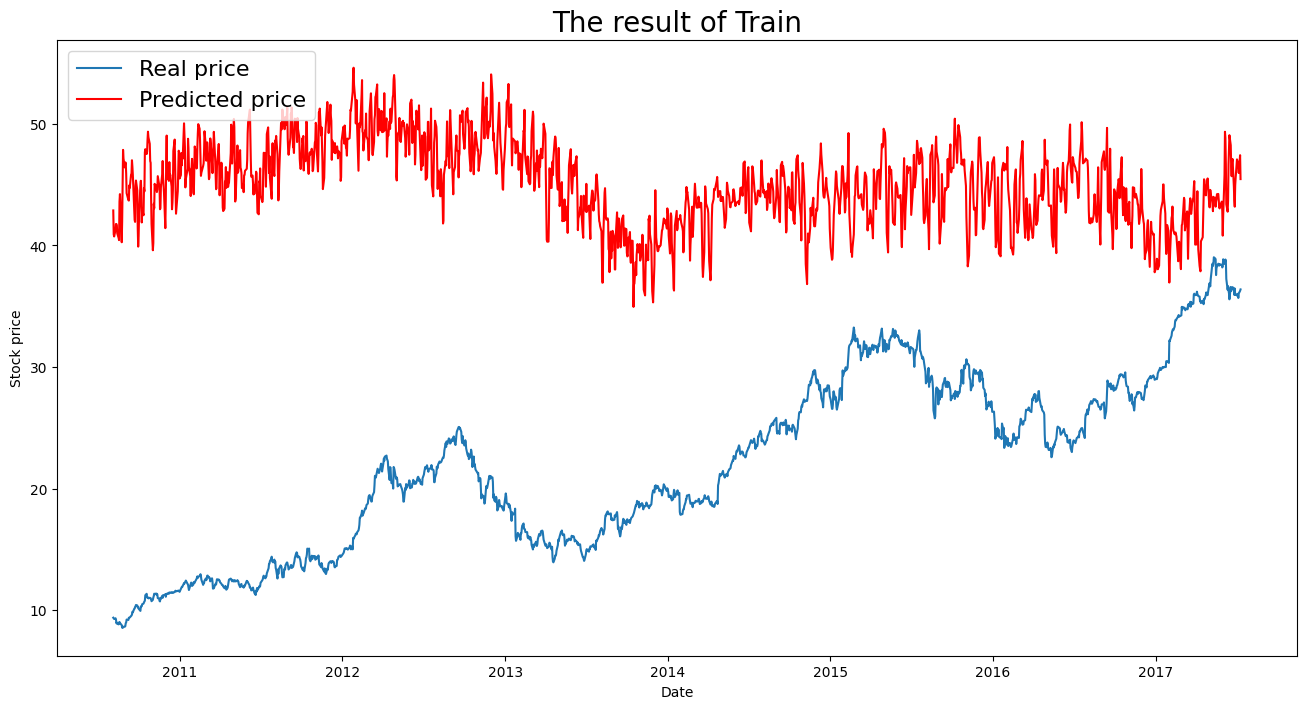

----- Train_RMSE_LSTM ----- 24.701480426526942


<ipython-input-23-b903f84220ed>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-23-b903f84220ed>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


            predicted_price  predicted_price  predicted_price  \
2019-12-17              NaN              NaN              NaN   
2019-12-18              NaN              NaN              NaN   
2019-12-19              NaN              NaN              NaN   
2019-12-20              NaN              NaN              NaN   
2019-12-23              NaN              NaN              NaN   
2019-12-24              NaN              NaN              NaN   
2019-12-26              NaN              NaN              NaN   
2019-12-27              NaN              NaN              NaN   
2019-12-30              NaN              NaN              NaN   
2019-12-31              NaN              NaN              NaN   

            predicted_price  predicted_price  predicted_price  \
2019-12-17              NaN              NaN              NaN   
2019-12-18              NaN              NaN              NaN   
2019-12-19              NaN              NaN              NaN   
2019-12-20              

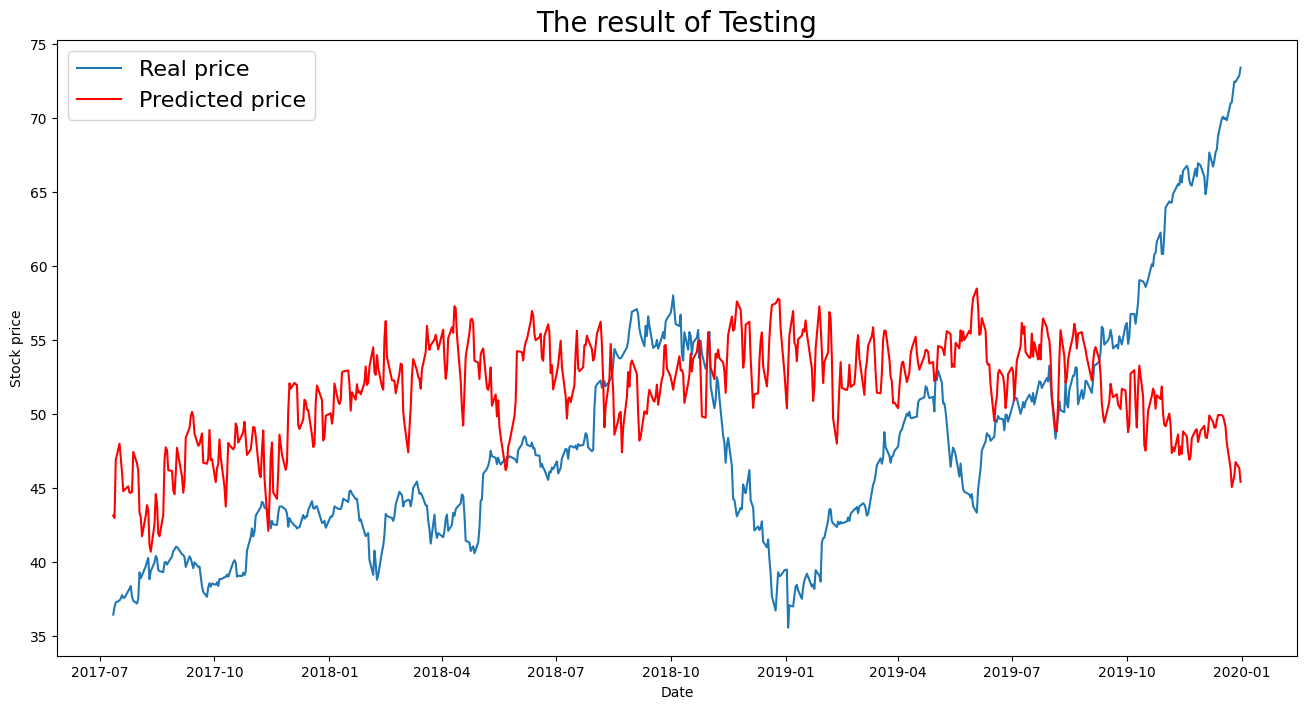

----- Test_RMSE_LSTM ----- 9.173314753573043


<ipython-input-24-02544fbb2a94>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-24-02544fbb2a94>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


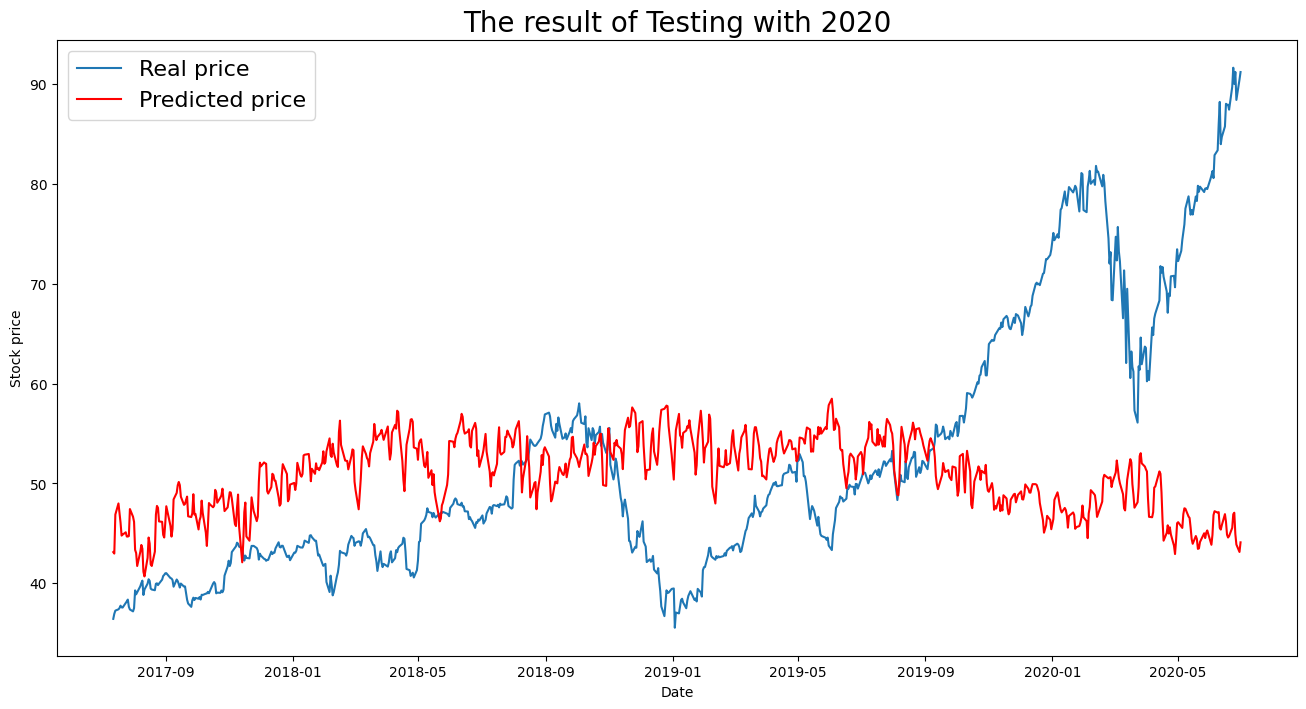

----- Test_RMSE_LSTM_with2020 ----- 14.777722719038938


'def plot_last3_testdataset_result(X_test, y_test):\n\n    test_yhat = model.predict(X_test[-1].reshape(1, X_test[-1].shape[0], X_test[-1].shape[1]), verbose=0)\n\n    X_scaler = load(open(\'X_scaler.pkl\', \'rb\'))\n    y_scaler = load(open(\'y_scaler.pkl\', \'rb\'))\n    test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)\n\n    rescaled_real_y = y_scaler.inverse_transform(y_test[-32:])\n    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)\n\n    #print("----- test dataset rescaled predicted price -----", rescaled_predicted_y)\n    #print("----- test dataset SHAPE rescaled predicted price -----", rescaled_predicted_y.shape)\n\n    ## Real price\n    real_price = pd.DataFrame()\n    for i in range(rescaled_real_y.shape[0]):\n        test_predict_index = test_predict_index[-34:]\n        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],\n                               index=test_predict_index[i:i + output_dim])\n        real_price = pd

In [ ]:
train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_LSTM -----", train_RMSE)

test_RMSE = plot_testdataset_result(X_test, y_test)
print("----- Test_RMSE_LSTM -----", test_RMSE)

test_with2020_RMSE = plot_testdataset_with2020_result(X_test, y_test)
print("----- Test_RMSE_LSTM_with2020 -----", test_with2020_RMSE)

'''def plot_last3_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test[-1].reshape(1, X_test[-1].shape[0], X_test[-1].shape[1]), verbose=0)

    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test[-32:])
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    #print("----- test dataset rescaled predicted price -----", rescaled_predicted_y)
    #print("----- test dataset SHAPE rescaled predicted price -----", rescaled_predicted_y.shape)

    ## Real price
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        test_predict_index = test_predict_index[-34:]
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    ## Predicted price
    predict_result = pd.DataFrame()
    y_predict = pd.DataFrame(rescaled_predicted_y[0], columns=["predicted_price"], index=test_predict_index[-3:])
    predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)
    #
    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.ylim(0, 100)
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of the last set of testdata", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real[-3:]))
    #print('-- test dataset RMSE -- ', RMSE)

    return RMSE'''


# Seção 4: Modelo LSTM

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow

from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Embedding, TimeDistributed, LeakyReLU
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot
from pickle import load

X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)

#Parameters
LR = 0.001
BATCH_SIZE = 64
N_EPOCH = 50

In [ ]:
input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 - 4s - 146ms/step - loss: 0.0984 - val_loss: 0.0583
Epoch 2/50
28/28 - 0s - 7ms/step - loss: 0.1218 - val_loss: 0.0335
Epoch 3/50
28/28 - 0s - 7ms/step - loss: 0.0518 - val_loss: 0.0514
Epoch 4/50
28/28 - 0s - 7ms/step - loss: 0.0114 - val_loss: 0.0678
Epoch 5/50
28/28 - 0s - 7ms/step - loss: 0.0428 - val_loss: 0.0211
Epoch 6/50
28/28 - 0s - 7ms/step - loss: 0.0342 - val_loss: 0.0107
Epoch 7/50
28/28 - 0s - 8ms/step - loss: 0.0133 - val_loss: 0.0076
Epoch 8/50
28/28 - 0s - 7ms/step - loss: 0.0318 - val_loss: 0.0232
Epoch 9/50
28/28 - 0s - 7ms/step - loss: 0.0081 - val_loss: 0.0185
Epoch 10/50
28/28 - 0s - 7ms/step - loss: 0.0128 - val_loss: 0.0043
Epoch 11/50
28/28 - 0s - 8ms/step - loss: 0.0200 - val_loss: 0.0203
Epoch 12/50
28/28 - 0s - 7ms/step - loss: 0.0078 - val_loss: 0.0335
Epoch 13/50
28/28 - 0s - 8ms/step - loss: 0.0056 - val_loss: 0.0169
Epoch 14/50
28/28 - 0s - 8ms/step - loss: 0.0164 - val_loss: 0.0085
Epoch 15/50
28/28 - 0s - 7ms/step - loss: 0.0082 - val_loss: 0.014

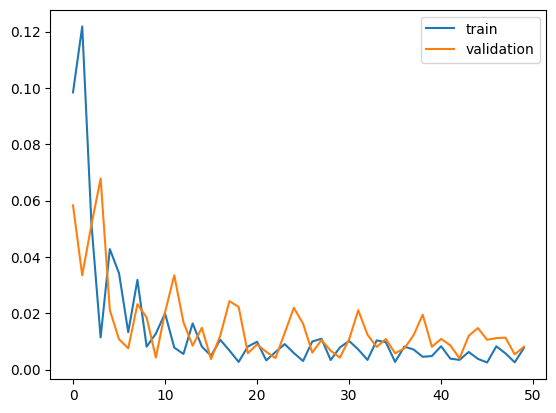

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 256)                 │         168,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 556,421 (2.12 MB)

 Trainable params: 185,473 (724.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 370,948 (1.42 MB)

None
0.09015551620073227


In [ ]:
def basic_lstm(input_dim, feature_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(units= 128), input_shape=(input_dim, feature_size)))
    model.add(Dense(64))
    model.add(Dense(units=output_dim))
    model.compile(optimizer=Adam(learning_rate=LR), loss='mse')
    history = model.fit(X_train, y_train, epochs=N_EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test),
                        verbose=2, shuffle=False)

    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()

    return model

model = basic_lstm(input_dim, feature_size)
model.save('LSTM_3to1.h5')
print(model.summary())

yhat = model.predict(X_test, verbose=0)
#print(yhat)

rmse = sqrt(mean_squared_error(y_test, yhat))
print(rmse)

In [ ]:
# %% --------------------------------------- Plot the TRAIN result  -----------------------------------------------------------------
## TRAIN DATA
def plot_traindataset_result(X_train, y_train):


    train_yhat = model.predict(X_train, verbose=0)

    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    train_predict_index = np.load("index_train.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
    #
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)
    #
    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Train RMSE -- ', RMSE)

    return RMSE

In [ ]:
# %% --------------------------------------- Plot the TEST result  -----------------------------------------------------------------
def plot_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test, verbose=0)
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("index_test.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    Input_Before = '2020-01-01'
    predict_result = predict_result.loc[predict_result.index < Input_Before]
    real_price = real_price.loc[real_price.index < Input_Before]

    print(predict_result.tail(10))

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Test RMSE -- ', RMSE)

    return RMSE

In [ ]:
def plot_testdataset_with2020_result(X_test, y_test):


    test_yhat = model.predict(X_test, 1, verbose=0)

    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("index_test.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Testing with 2020", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    #print('-- Test RMSE with 2020 -- ', RMSE)

    return RMSE

<ipython-input-29-8af2211991e3>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-29-8af2211991e3>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


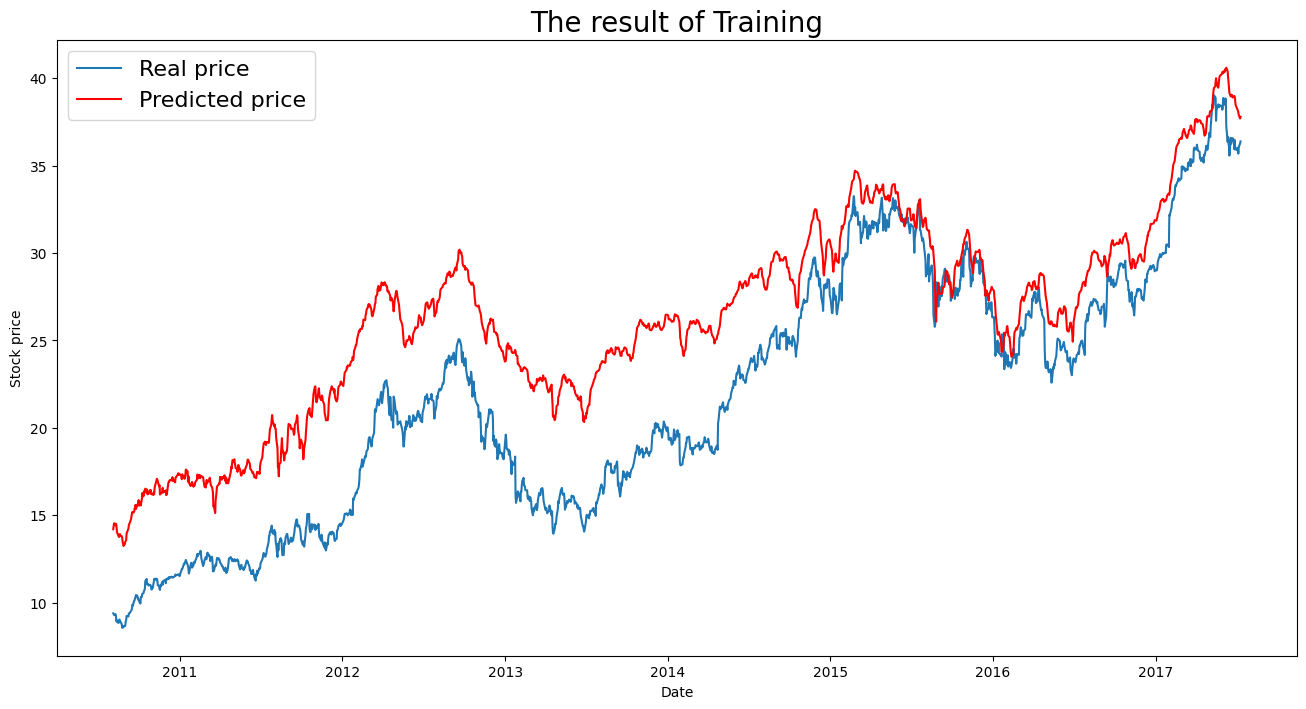

----- Train_RMSE_LSTM ----- 4.8850486879285056


<ipython-input-30-66dd33766f9c>:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-30-66dd33766f9c>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


            predicted_price  predicted_price  predicted_price  \
2019-12-17              NaN              NaN              NaN   
2019-12-18              NaN              NaN              NaN   
2019-12-19              NaN              NaN              NaN   
2019-12-20              NaN              NaN              NaN   
2019-12-23              NaN              NaN              NaN   
2019-12-24              NaN              NaN              NaN   
2019-12-26              NaN              NaN              NaN   
2019-12-27              NaN              NaN              NaN   
2019-12-30              NaN              NaN              NaN   
2019-12-31              NaN              NaN              NaN   

            predicted_price  predicted_price  predicted_price  \
2019-12-17              NaN              NaN              NaN   
2019-12-18              NaN              NaN              NaN   
2019-12-19              NaN              NaN              NaN   
2019-12-20              

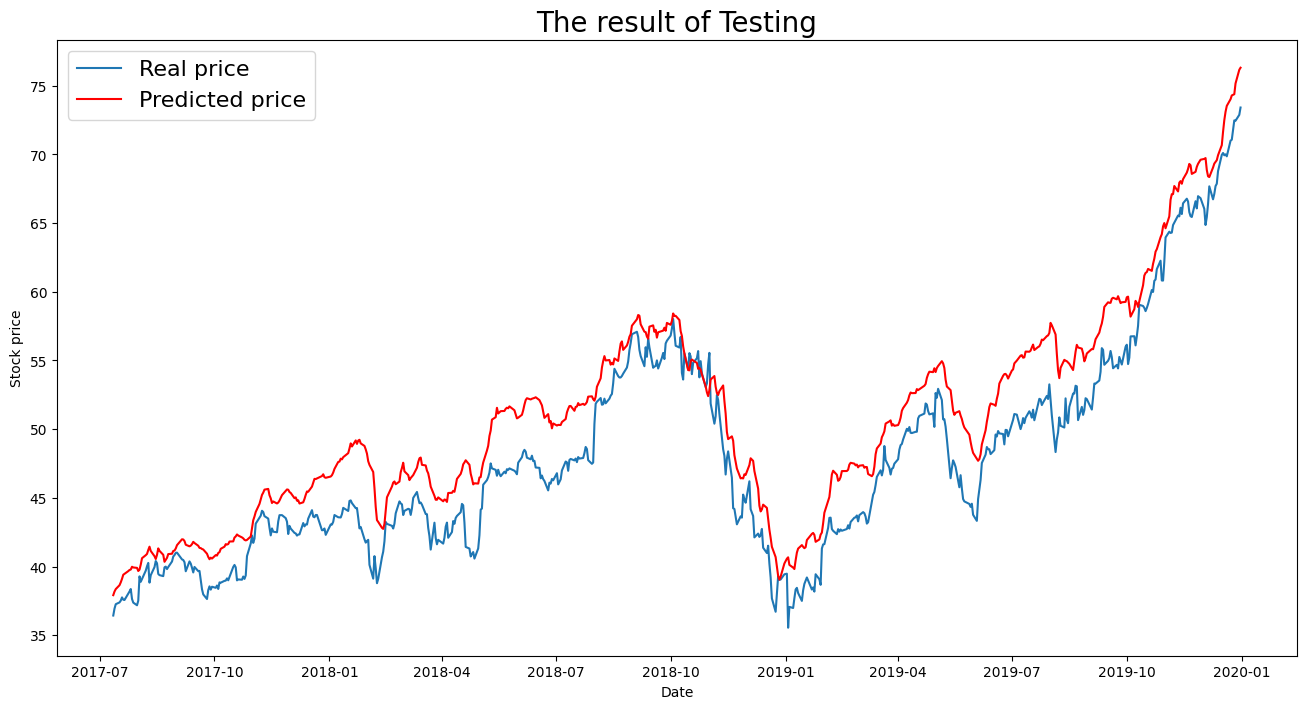

----- Test_RMSE_LSTM ----- 3.2029271788227365


<ipython-input-31-02544fbb2a94>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-31-02544fbb2a94>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


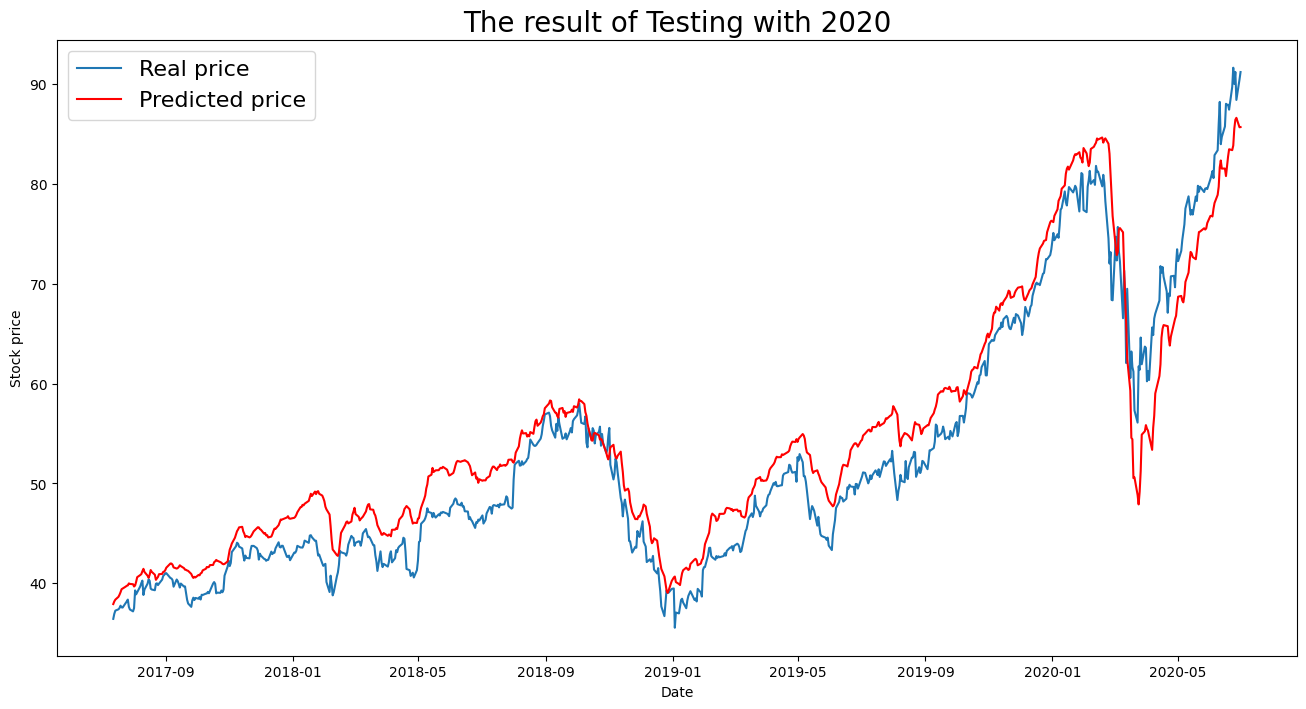

----- Test_RMSE_LSTM_with2020 ----- 3.7444229125036097


'def plot_last3_testdataset_result(X_test, y_test):\n\n    test_yhat = model.predict(X_test[-1].reshape(1, X_test[-1].shape[0], X_test[-1].shape[1]), verbose=0)\n\n    X_scaler = load(open(\'X_scaler.pkl\', \'rb\'))\n    y_scaler = load(open(\'y_scaler.pkl\', \'rb\'))\n    test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)\n\n    rescaled_real_y = y_scaler.inverse_transform(y_test[-32:])\n    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)\n\n    #print("----- test dataset rescaled predicted price -----", rescaled_predicted_y)\n    #print("----- test dataset SHAPE rescaled predicted price -----", rescaled_predicted_y.shape)\n\n    ## Real price\n    real_price = pd.DataFrame()\n    for i in range(rescaled_real_y.shape[0]):\n        test_predict_index = test_predict_index[-34:]\n        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],\n                               index=test_predict_index[i:i + output_dim])\n        real_price = pd

In [ ]:
train_RMSE = plot_traindataset_result(X_train, y_train)
print("----- Train_RMSE_LSTM -----", train_RMSE)

test_RMSE = plot_testdataset_result(X_test, y_test)
print("----- Test_RMSE_LSTM -----", test_RMSE)

test_with2020_RMSE = plot_testdataset_with2020_result(X_test, y_test)
print("----- Test_RMSE_LSTM_with2020 -----", test_with2020_RMSE)

'''def plot_last3_testdataset_result(X_test, y_test):

    test_yhat = model.predict(X_test[-1].reshape(1, X_test[-1].shape[0], X_test[-1].shape[1]), verbose=0)

    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("test_predict_index.npy", allow_pickle=True)

    rescaled_real_y = y_scaler.inverse_transform(y_test[-32:])
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    #print("----- test dataset rescaled predicted price -----", rescaled_predicted_y)
    #print("----- test dataset SHAPE rescaled predicted price -----", rescaled_predicted_y.shape)

    ## Real price
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        test_predict_index = test_predict_index[-34:]
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                               index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    ## Predicted price
    predict_result = pd.DataFrame()
    y_predict = pd.DataFrame(rescaled_predicted_y[0], columns=["predicted_price"], index=test_predict_index[-3:])
    predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)
    #
    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    #plt.ylim(0, 110)
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of the last set of testdata", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real[-3:]))
    #print('-- test dataset RMSE -- ', RMSE)

    return RMSE'''

# Seção 5: Modelo GAN

In [ ]:
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
#from main.feature import get_all_features
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from pickle import load
from sklearn.metrics import mean_squared_error

X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)

In [ ]:
def make_generator_model(input_dim, output_dim, feature_size) -> tf.keras.models.Model:

    model = Sequential()
    model.add(GRU(units=1024, return_sequences = True, input_shape=(input_dim, feature_size),
                  recurrent_dropout=0.2))
    model.add(GRU(units=512, return_sequences = True, recurrent_dropout=0.2)) # 256, return_sequences = True
    model.add(GRU(units=256, recurrent_dropout=0.2)) #, recurrent_dropout=0.1
    # , recurrent_dropout = 0.2
    model.add(Dense(128))
    # model.add(Dense(128))
    model.add(Dense(64))
    #model.add(Dense(16))
    model.add(Dense(units=output_dim))
    return model

def make_discriminator_model():

    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(32, input_shape=(4, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=5, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Flatten())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net


model = make_discriminator_model()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 2, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 64)               │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 128)              │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 220)                 │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 220)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 220)                 │          48,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             221 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,301 (501.18 KB)

 Trainable params: 128,301 (501.18 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
class GAN:
    def __init__(self, generator, discriminator, opt):
        self.generator = generator
        self.discriminator = discriminator
        self.learning_rate = opt["learning_rate"]  # Use 'learning_rate' instead of 'lr'
        self.batch_size = opt["bs"]
        self.epochs = opt["epoch"]

        # Optimizers
        self.generator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)

        # Loss function
        self.cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

        # Checkpoints
        self.checkpoint_dir = "./checkpoints"
        os.makedirs(self.checkpoint_dir, exist_ok=True)
        self.checkpoint_prefix = os.path.join(self.checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(
            generator_optimizer=self.generator_optimizer,
            discriminator_optimizer=self.discriminator_optimizer,
            generator=self.generator,
            discriminator=self.discriminator
        )

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        return real_loss + fake_loss

    def generator_loss(self, fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    @tf.function
    def train_step(self, real_x, real_y, yc):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            # Generate data using the generator
            generated_data = self.generator(real_x, training=True)

            # Ensure data types match for concatenation
            gen_data_reshaped = tf.cast(tf.expand_dims(generated_data, -1), tf.float32)
            real_y_reshaped = tf.cast(tf.expand_dims(real_y, -1), tf.float32)
            yc = tf.cast(yc, tf.float32)

            # Validate shapes
            tf.debugging.assert_non_negative(tf.shape(yc)[0], message="Batch size of yc is 0!")
            tf.debugging.assert_greater_equal(real_y_reshaped.shape[0], yc.shape[0], message="Batch size mismatch between real_y and yc!")

            # Tile yc to match the batch size of real_y_reshaped
            repeats = real_y_reshaped.shape[0] // yc.shape[0]
            yc_tiled = tf.tile(yc, [repeats, 1, 1])

            # Concatenate inputs for discriminator
            d_fake_input = tf.concat([gen_data_reshaped, yc_tiled], axis=1)
            d_real_input = tf.concat([real_y_reshaped, yc_tiled], axis=1)

            # Discriminator predictions
            real_output = self.discriminator(d_real_input, training=True)
            fake_output = self.discriminator(d_fake_input, training=True)

            # Compute losses
            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)

        # Backpropagation
        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, self.discriminator.trainable_variables))

        return generated_data, {'d_loss': disc_loss, 'g_loss': gen_loss}



    def train(self, real_x, real_y, yc):
        train_hist = {'D_losses': [], 'G_losses': [], 'per_epoch_times': []}

        for epoch in range(self.epochs):
            start = time.time()

            generated_data, loss = self.train_step(real_x, real_y, yc)

            # Track losses
            train_hist['D_losses'].append(loss['d_loss'].numpy())
            train_hist['G_losses'].append(loss['g_loss'].numpy())

            # Save the model every 15 epochs
            if (epoch + 1) % 15 == 0:
                self.generator.save(f'generator_epoch_{epoch+1}.h5')
                self.checkpoint.save(file_prefix=self.checkpoint_prefix + f'-{epoch+1}')
                print(f"Epoch {epoch+1}: d_loss = {loss['d_loss'].numpy():.4f}, g_loss = {loss['g_loss'].numpy():.4f}")

            # Log epoch time
            epoch_end_time = time.time()
            train_hist['per_epoch_times'].append(epoch_end_time - start)

        # Return predicted and real values for analysis
        return generated_data, real_y, np.sqrt(mean_squared_error(real_y, generated_data)) / np.mean(real_y)


In [ ]:
# Initialize and train the GAN
input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]

opt = {"learning_rate": 0.00016, "epoch": 165, 'bs': 128}
generator = make_generator_model(input_dim, output_dim, feature_size)
discriminator = make_discriminator_model()
gan = GAN(generator, discriminator, opt)

# Train the GAN
Predicted_price, Real_price, RMSPE = gan.train(X_train, y_train, yc_train)

print("RMSPE:", RMSPE)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 15: d_loss = 1.4014, g_loss = 0.6688


Epoch 30: d_loss = 1.2792, g_loss = 0.8118


Epoch 45: d_loss = 1.3771, g_loss = 0.6986


Epoch 60: d_loss = 1.3873, g_loss = 0.6835


Epoch 75: d_loss = 1.3857, g_loss = 0.6889


Epoch 90: d_loss = 1.3859, g_loss = 0.6920


Epoch 105: d_loss = 1.3860, g_loss = 0.6935


Epoch 120: d_loss = 1.3861, g_loss = 0.6936


Epoch 135: d_loss = 1.3861, g_loss = 0.6934


Epoch 150: d_loss = 1.3861, g_loss = 0.6932


Epoch 165: d_loss = 1.3862, g_loss = 0.6931
RMSPE: -0.03139497580855191


<ipython-input-37-54ab61f5353b>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-37-54ab61f5353b>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


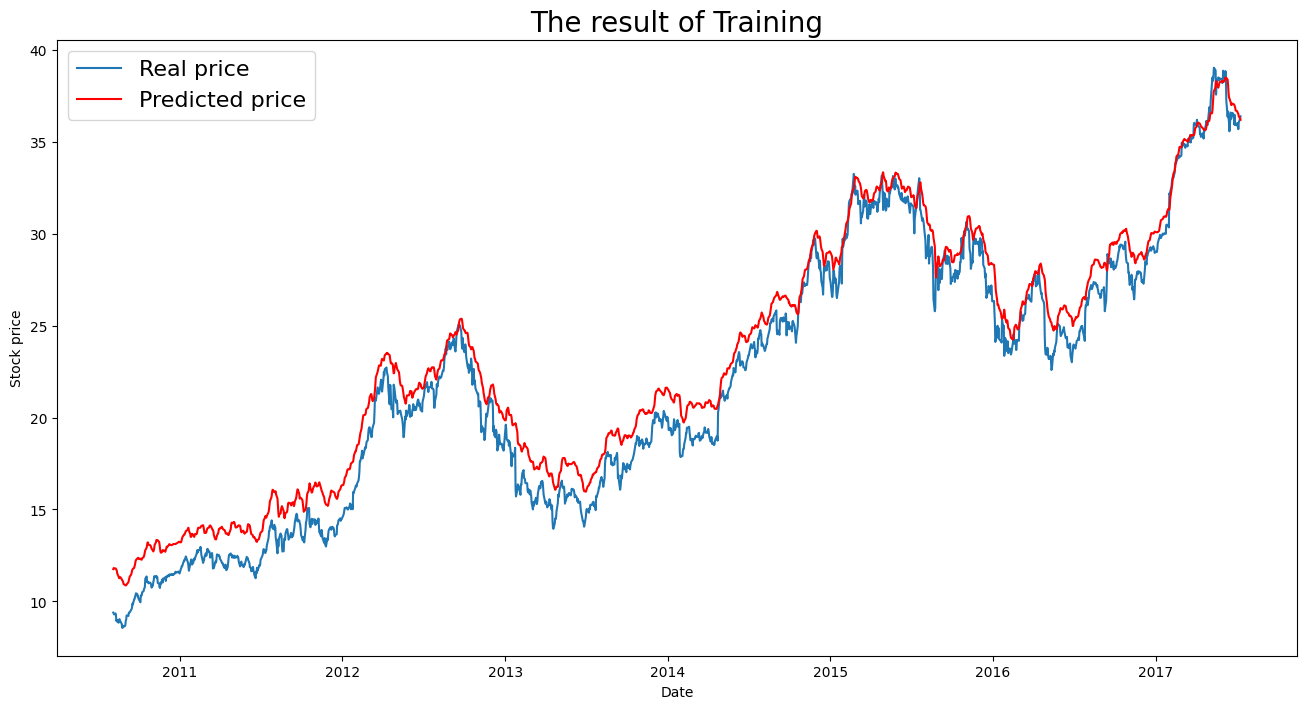

----- Train_RMSE ----- 1.4414983534228523


<ipython-input-37-54ab61f5353b>:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-37-54ab61f5353b>:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


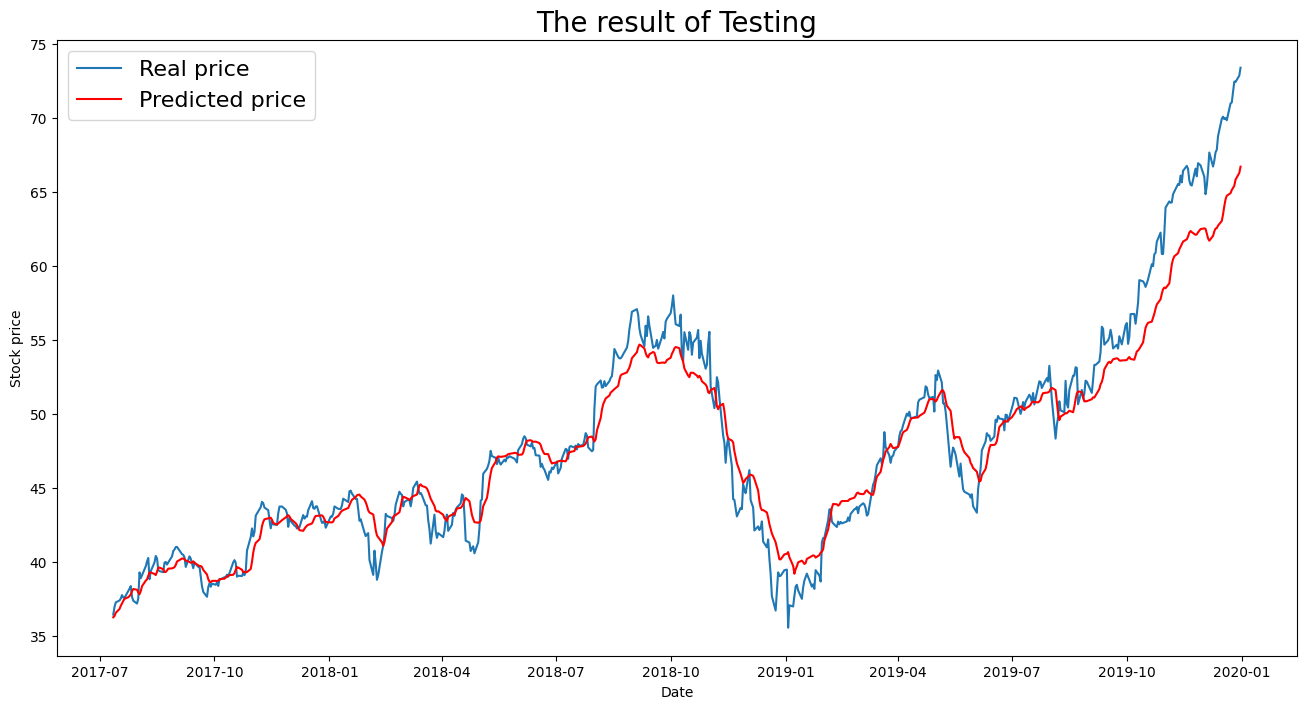

----- Test_RMSE ----- 1.982097598906501


<ipython-input-37-54ab61f5353b>:109: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-37-54ab61f5353b>:110: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


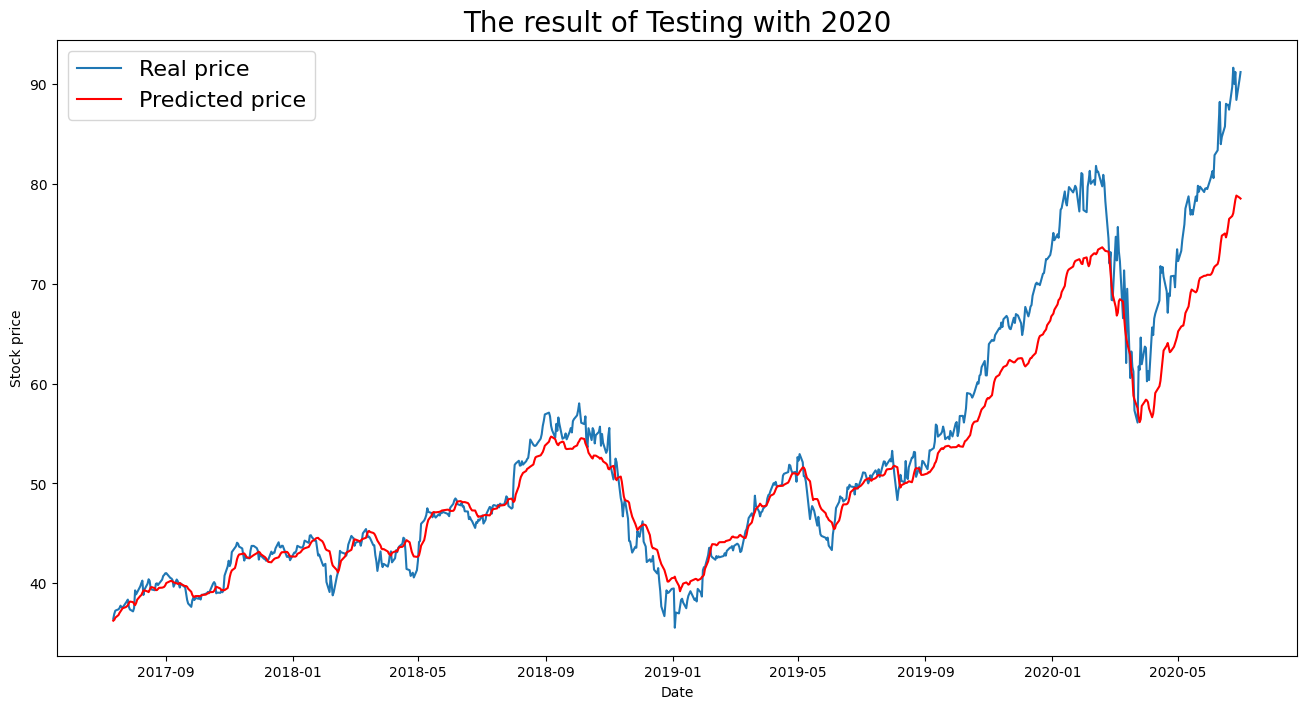

----- Test_RMSE_with2020 ----- 3.7759762672718886


In [ ]:
# Plot TRAIN results
def plot_traindataset_result(X_train, y_train, generator):
    train_yhat = generator.predict(X_train, verbose=0)  # Use the generator for prediction

    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    train_predict_index = np.load("index_train.npy", allow_pickle=True)

    # Rescale real and predicted values
    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=train_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train_df = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                                  index=train_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train_df], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot predicted vs. real results
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"], label="Real price")
    plt.plot(predict_result["predicted_mean"], color='r', label="Predicted price")
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(loc="upper left", fontsize=16)
    plt.title("The result of Training", fontsize=20)
    plt.show()

    # Calculate RMSE
    RMSE = np.sqrt(mean_squared_error(real_price["real_mean"], predict_result["predicted_mean"]))
    return RMSE

# Plot TEST results
def plot_testdataset_result(X_test, y_test, generator):
    test_yhat = generator.predict(X_test, verbose=0)  # Use the generator for prediction

    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("index_test.npy", allow_pickle=True)

    # Rescale real and predicted values
    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_test_df = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                                 index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_test_df], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    Input_Before = '2020-01-01'
    predict_result = predict_result.loc[predict_result.index < Input_Before]
    real_price = real_price.loc[real_price.index < Input_Before]

    # Plot predicted vs. real results
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"], label="Real price")
    plt.plot(predict_result["predicted_mean"], color='r', label="Predicted price")
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(loc="upper left", fontsize=16)
    plt.title("The result of Testing", fontsize=20)
    plt.show()

    # Calculate RMSE
    RMSE = np.sqrt(mean_squared_error(real_price["real_mean"], predict_result["predicted_mean"]))
    return RMSE

# Plot TEST results including 2020
def plot_testdataset_with2020_result(X_test, y_test, generator):
    test_yhat = generator.predict(X_test, verbose=0)  # Use the generator for prediction

    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = np.load("index_test.npy", allow_pickle=True)

    # Rescale real and predicted values
    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_test_df = pd.DataFrame(rescaled_real_y[i], columns=["real_price"],
                                 index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_test_df], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot predicted vs. real results
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"], label="Real price")
    plt.plot(predict_result["predicted_mean"], color='r', label="Predicted price")
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(loc="upper left", fontsize=16)
    plt.title("The result of Testing with 2020", fontsize=20)
    plt.show()

    # Calculate RMSE
    RMSE = np.sqrt(mean_squared_error(real_price["real_mean"], predict_result["predicted_mean"]))
    return RMSE

# Evaluate results
train_RMSE = plot_traindataset_result(X_train, y_train, gan.generator)
print("----- Train_RMSE -----", train_RMSE)

test_RMSE = plot_testdataset_result(X_test, y_test, gan.generator)
print("----- Test_RMSE -----", test_RMSE)

test_with2020_RMSE = plot_testdataset_with2020_result(X_test, y_test, gan.generator)
print("----- Test_RMSE_with2020 -----", test_with2020_RMSE)


# Seção 6: Modelo WGAN

In [ ]:
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.layers import GRU, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, ELU, ReLU
from tensorflow.keras import Sequential, regularizers
from tensorflow.python.client import device_lib

# Load data
X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)
yc_train = np.load("yc_train.npy", allow_pickle=True)
yc_test = np.load("yc_test.npy", allow_pickle=True)

In [ ]:
# Define the generator
def Generator(input_dim, output_dim, feature_size) -> tf.keras.models.Model:
    model = Sequential()
    model.add(GRU(units=256,
                  return_sequences=True,
                  input_shape=(input_dim, feature_size),
                  recurrent_dropout=0.02,
                  recurrent_regularizer=regularizers.l2(1e-3)))
    model.add(GRU(units=128,
                  #return_sequences=True,
                  recurrent_dropout=0.02,
                  recurrent_regularizer=regularizers.l2(1e-3)))
    #model.add(Dense(128,
    #              kernel_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(64, kernel_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(32, kernel_regularizer=regularizers.l2(1e-3)))
    #model.add(Dense(16, kernel_regularizer=regularizers.l2(1e-3)))
    #model.add(Dense(8, kernel_regularizer=regularizers.l2(1e-3)))
    model.add(Dense(units=output_dim))
    return model

# Define the discriminator
def Discriminator() -> tf.keras.models.Model:
    model = tf.keras.Sequential()
    model.add(Conv1D(32, input_shape=(4, 1), kernel_size=3, strides=2, padding="same", activation=LeakyReLU(alpha=0.01)))
    model.add(Conv1D(64, kernel_size=3, strides=2, padding="same", activation=LeakyReLU(alpha=0.01)))
    model.add(Conv1D(128, kernel_size=3, strides=2, padding="same", activation=LeakyReLU(alpha=0.01)))
    model.add(Flatten())
    model.add(Dense(220, use_bias=True))
    model.add(LeakyReLU())
    model.add(Dense(220, use_bias=True))
    model.add(ReLU())
    model.add(Dense(1))
    return model

In [ ]:
# Train WGAN-GP model
class GAN():
    def __init__(self, generator, discriminator):
        super(GAN, self).__init__()
        self.d_optimizer = tf.keras.optimizers.Adam(0.0001)
        self.g_optimizer = tf.keras.optimizers.Adam(0.0001)
        self.generator = generator
        self.discriminator = discriminator
        self.batch_size = 128
        checkpoint_dir = '../training_checkpoints'
        self.checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
        self.checkpoint = tf.train.Checkpoint(generator_optimizer=self.g_optimizer,
                                              discriminator_optimizer=self.d_optimizer,
                                              generator=self.generator,
                                              discriminator=self.discriminator)

    def gradient_penalty(self, batch_size, real_output, fake_output):
        """ Calculates the gradient penalty.

        This loss is calculated on an interpolated image
        and added to the discriminator loss.
        """
        # get the interpolated data
        alpha = tf.random.normal([batch_size, 4, 1], 0.0, 1.0)
        diff = fake_output - tf.cast(real_output, tf.float32)
        interpolated = tf.cast(real_output, tf.float32) + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 1. Get the discriminator output for this interpolated image.
            pred = self.discriminator(interpolated, training=True)

        # 2. Calculate the gradients w.r.t to this interpolated image.
        grads = gp_tape.gradient(pred, [interpolated])[0]

        # 3. Calcuate the norm of the gradients
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2]))

        gp = tf.reduce_mean((norm - 1.0) ** 2)
        return gp

    def train_step(self, data):
        real_input, real_price, yc = data
        batch_size = tf.shape(real_input)[0]
        for _ in range(1):
            with tf.GradientTape() as d_tape:
                # Train the discriminator
                # generate fake output
                generated_data = self.generator(real_input, training=True)
                # reshape the data
                generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
                fake_output = tf.concat([generated_data_reshape, tf.cast(yc, tf.float32)], axis=1)
                real_y_reshape = tf.reshape(real_price, [real_price.shape[0], real_price.shape[1], 1])
                real_output = tf.concat([tf.cast(real_y_reshape, tf.float32), tf.cast(yc, tf.float32)], axis=1)
                # Get the logits for the fake images
                D_real = self.discriminator(real_output, training=True)
                # Get the logits for real images
                D_fake = self.discriminator(fake_output, training=True)
                # Calculate discriminator loss using fake and real logits
                real_loss = tf.cast(tf.reduce_mean(D_real), tf.float32)
                fake_loss = tf.cast(tf.reduce_mean(D_fake), tf.float32)
                d_cost = fake_loss-real_loss
                # Calculate the gradientjiu penalty
                gp = self.gradient_penalty(batch_size, real_output, fake_output)
                # Add the gradient penalty to the original discriminator loss
                d_loss = d_cost + gp * 10

            d_grads = d_tape.gradient(d_loss, self.discriminator.trainable_variables)
            self.d_optimizer.apply_gradients(zip(d_grads, self.discriminator.trainable_variables))
        for _ in range(3):
            with tf.GradientTape() as g_tape:
                # Train the generator
                # generate fake output
                generated_data = self.generator(real_input, training=True)
                # reshape the data
                generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
                fake_output = tf.concat([generated_data_reshape, tf.cast(yc, tf.float32)], axis=1)
                # Get the discriminator logits for fake images
                G_fake = self.discriminator(fake_output, training=True)
                # Calculate the generator loss
                g_loss = -tf.reduce_mean(G_fake)
            g_grads = g_tape.gradient(g_loss, self.generator.trainable_variables)
            self.g_optimizer.apply_gradients(zip(g_grads, self.generator.trainable_variables))

        return real_price, generated_data, {'d_loss': d_loss, 'g_loss': g_loss}

    def train(self, X_train, y_train, yc, epochs):
        data = X_train, y_train, yc
        train_hist = {}
        train_hist['D_losses'] = []
        train_hist['G_losses'] = []
        train_hist['per_epoch_times'] = []
        train_hist['total_ptime'] = []


        for epoch in range(epochs):
            start = time.time()

            real_price, fake_price, loss = self.train_step(data)

            G_losses = []
            D_losses = []

            Real_price = []
            Predicted_price = []

            D_losses.append(loss['d_loss'].numpy())
            G_losses.append(loss['g_loss'].numpy())

            Predicted_price.append(fake_price)
            Real_price.append(real_price)

            # Save the model every 15 epochs
            if (epoch + 1) % 15 == 0:
                tf.keras.models.save_model(generator, 'gen_GRU_model_%d.h5' % epoch)
                self.checkpoint.save(file_prefix=self.checkpoint_prefix)
                print('epoch', epoch+1, 'd_loss', loss['d_loss'].numpy(), 'g_loss', loss['g_loss'].numpy())

            # For printing loss
            epoch_end_time = time.time()
            per_epoch_ptime = epoch_end_time - start
            train_hist['D_losses'].append(D_losses)
            train_hist['G_losses'].append(G_losses)
            train_hist['per_epoch_times'].append(per_epoch_ptime)

        # Reshape the predicted result & real
        Predicted_price = np.array(Predicted_price)
        Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
        Real_price = np.array(Real_price)
        Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

        # Plot the loss
        plt.plot(train_hist['D_losses'], label='D_loss')
        plt.plot(train_hist['G_losses'], label='G_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        plt.savefig('train_loss.png')

        print("REAL", Real_price.shape)
        print(Real_price)
        print("PREDICTED", Predicted_price.shape)
        print(Predicted_price)

        return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(Real_price)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


epoch 15 d_loss 9.038249 g_loss 0.025473837


epoch 30 d_loss 8.162932 g_loss 0.060169138


epoch 45 d_loss 7.184433 g_loss 0.12277819


epoch 60 d_loss 5.4740453 g_loss 0.22075434


epoch 75 d_loss 3.1131656 g_loss 0.37259737


epoch 90 d_loss 0.82157224 g_loss 0.5846832


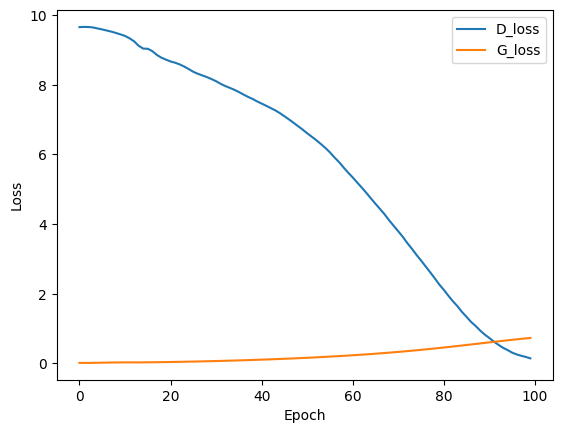

REAL (1746, 1)
[[-0.9801787 ]
 [-0.9812794 ]
 [-0.98266388]
 ...
 [-0.33843275]
 [-0.33313558]
 [-0.3303064 ]]
PREDICTED (1746, 1)
[[-1.4152703 ]
 [-1.4063616 ]
 [-1.3717494 ]
 ...
 [-0.3549164 ]
 [-0.35656512]
 [-0.33123675]]


<Figure size 640x480 with 0 Axes>

In [ ]:
input_dim = X_train.shape[1]
feature_size = X_train.shape[2]
output_dim = y_train.shape[1]
epoch = 100

generator = Generator(X_train.shape[1], output_dim, X_train.shape[2])
discriminator = Discriminator()
gan = GAN(generator, discriminator)
Predicted_price, Real_price, RMSPE = gan.train(X_train, y_train, yc_train, epoch)

In [ ]:
def plot_traindataset_result(generator, X_train, y_train, yc_train, X_scaler_path, y_scaler_path, train_index_path):
    # Load scalers and train indices
    X_scaler = load(open(X_scaler_path, 'rb'))
    y_scaler = load(open(y_scaler_path, 'rb'))
    train_predict_index = np.load(train_index_path, allow_pickle=True)

    # Predict with the generator
    train_yhat = generator.predict(X_train, verbose=0)

    # Rescale real and predicted prices
    rescaled_real_y = y_scaler.inverse_transform(y_train)
    rescaled_predicted_y = y_scaler.inverse_transform(train_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(
            rescaled_predicted_y[i],
            columns=["predicted_price"],
            index=train_predict_index[i:i + rescaled_predicted_y.shape[1]]
        )
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_real = pd.DataFrame(
            rescaled_real_y[i],
            columns=["real_price"],
            index=train_predict_index[i:i + rescaled_real_y.shape[1]]
        )
        real_price = pd.concat([real_price, y_real], axis=1, sort=False)

    # Align indices to avoid mismatch
    common_index = predict_result.index.intersection(real_price.index)
    predict_result = predict_result.loc[common_index]
    real_price = real_price.loc[common_index]

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"], label="Real price")
    plt.plot(predict_result["predicted_mean"], color='r', label="Predicted price")
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(loc="upper left", fontsize=16)
    plt.title("The result of Training", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print("-- Train RMSE --", RMSE)

    return RMSE


In [ ]:
def plot_traindataset_result(Predicted_price, Real_price, X_scaler_path, y_scaler_path, train_index_path, output_dim):
    # Load scalers and train indices
    X_scaler = load(open(X_scaler_path, 'rb'))
    y_scaler = load(open(y_scaler_path, 'rb'))
    train_predict_index = np.load(train_index_path, allow_pickle=True)

    # Rescale real and predicted prices
    rescaled_Real_price = y_scaler.inverse_transform(Real_price)
    rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

    print("----- rescaled predicted price -----", rescaled_Predicted_price)
    print("----- SHAPE rescaled predicted price -----", rescaled_Predicted_price.shape)

    predict_result = pd.DataFrame()
    for i in range(rescaled_Predicted_price.shape[0]):
        y_predict = pd.DataFrame(
            rescaled_Predicted_price[i],
            columns=["predicted_price"],
            index=train_predict_index[i:i + output_dim]
        )
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_Real_price.shape[0]):
        y_real = pd.DataFrame(
            rescaled_Real_price[i],
            columns=["real_price"],
            index=train_predict_index[i:i + output_dim]
        )
        real_price = pd.concat([real_price, y_real], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"], label="Real price")
    plt.plot(predict_result["predicted_mean"], color='r', label="Predicted price")
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(loc="upper left", fontsize=16)
    plt.title("The result of Training", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print("-- Train RMSE --", RMSE)

    return RMSE


In [ ]:
def plot_testdataset_result(generator, X_test, y_test, yc_test, y_scaler_path, test_index_path):
    # Load scalers and test indices
    y_scaler = load(open(y_scaler_path, 'rb'))
    test_predict_index = np.load(test_index_path, allow_pickle=True)

    # Predict with the generator
    test_yhat = generator.predict(X_test, verbose=0)

    # Rescale real and predicted prices
    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(
            rescaled_predicted_y[i],
            columns=["predicted_price"],
            index=test_predict_index[i:i + rescaled_predicted_y.shape[1]]
        )
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_real = pd.DataFrame(
            rescaled_real_y[i],
            columns=["real_price"],
            index=test_predict_index[i:i + rescaled_real_y.shape[1]]
        )
        real_price = pd.concat([real_price, y_real], axis=1, sort=False)

    # Align indices to avoid mismatch
    common_index = predict_result.index.intersection(real_price.index)
    predict_result = predict_result.loc[common_index]
    real_price = real_price.loc[common_index]

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"], label="Real price")
    plt.plot(predict_result["predicted_mean"], color='r', label="Predicted price")
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(loc="upper left", fontsize=16)
    plt.title("The result of Testing", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print("-- Test RMSE --", RMSE)

    return RMSE


In [ ]:
def plot_testdataset_with2020_result(generator, X_test, y_test, yc_test, y_scaler_path, test_index_path):
    # Load scalers and test indices
    y_scaler = load(open(y_scaler_path, 'rb'))
    test_predict_index = np.load(test_index_path, allow_pickle=True)

    # Predict with the generator
    test_yhat = generator.predict(X_test, verbose=0)

    # Rescale real and predicted prices
    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(test_yhat)

    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(
            rescaled_predicted_y[i],
            columns=["predicted_price"],
            index=test_predict_index[i:i + rescaled_predicted_y.shape[1]]
        )
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_real = pd.DataFrame(
            rescaled_real_y[i],
            columns=["real_price"],
            index=test_predict_index[i:i + rescaled_real_y.shape[1]]
        )
        real_price = pd.concat([real_price, y_real], axis=1, sort=False)

    # Align indices to avoid mismatch
    common_index = predict_result.index.intersection(real_price.index)
    predict_result = predict_result.loc[common_index]
    real_price = real_price.loc[common_index]

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    # Filter for data up to 2020 (example logic, modify as needed)
    filter_date = '2020-01-01'
    predict_result = predict_result.loc[predict_result.index < filter_date]
    real_price = real_price.loc[real_price.index < filter_date]

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"], label="Real price")
    plt.plot(predict_result["predicted_mean"], color='r', label="Predicted price")
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(loc="upper left", fontsize=16)
    plt.title("The result of Testing with data up to 2020", fontsize=20)
    plt.show()

    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print("-- Test RMSE with data up to 2020 --", RMSE)

    return RMSE


----- rescaled predicted price ----- [[-8.677989]
 [-8.307993]
 [-6.870487]
 ...
 [35.3604  ]
 [35.291927]
 [36.34386 ]]
----- SHAPE rescaled predicted price ----- (1746, 1)


<ipython-input-43-c03c8c742a77>:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-43-c03c8c742a77>:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


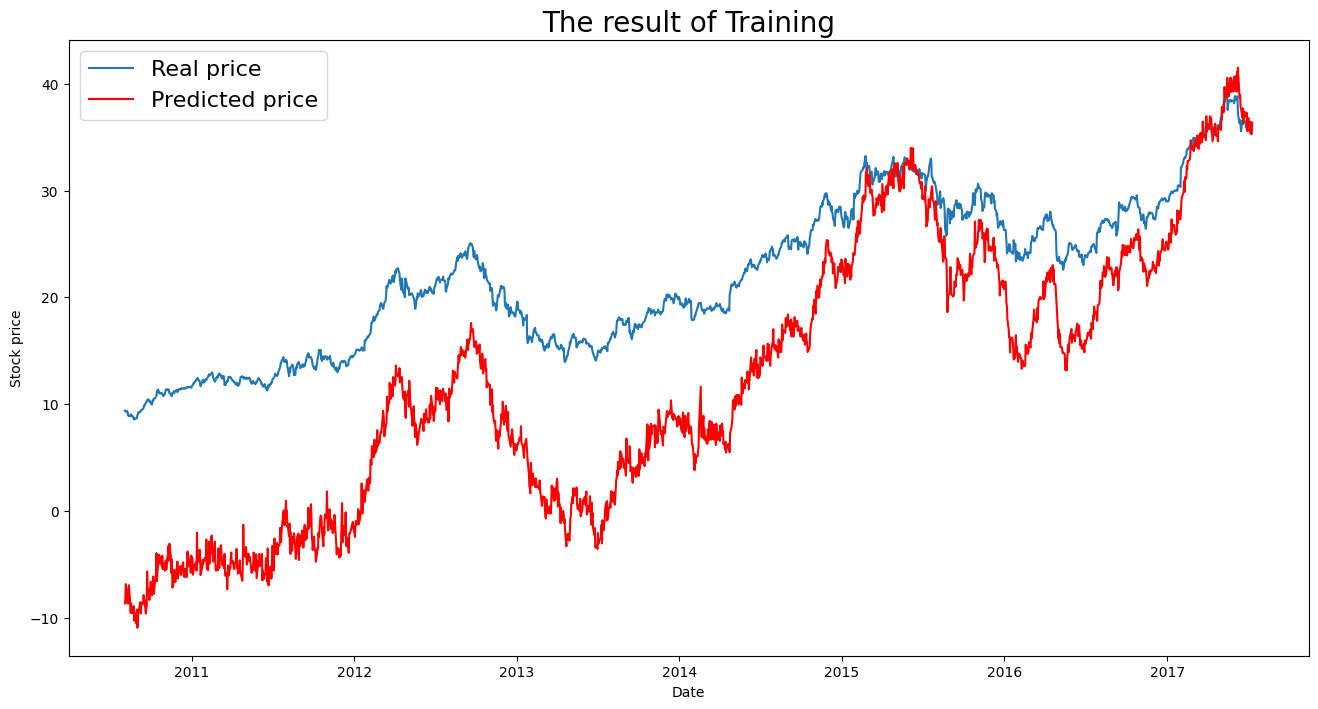

-- Train RMSE -- 11.257844983616176
----- Train RMSE ----- 11.257844983616176


<ipython-input-46-56f343324330>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-46-56f343324330>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


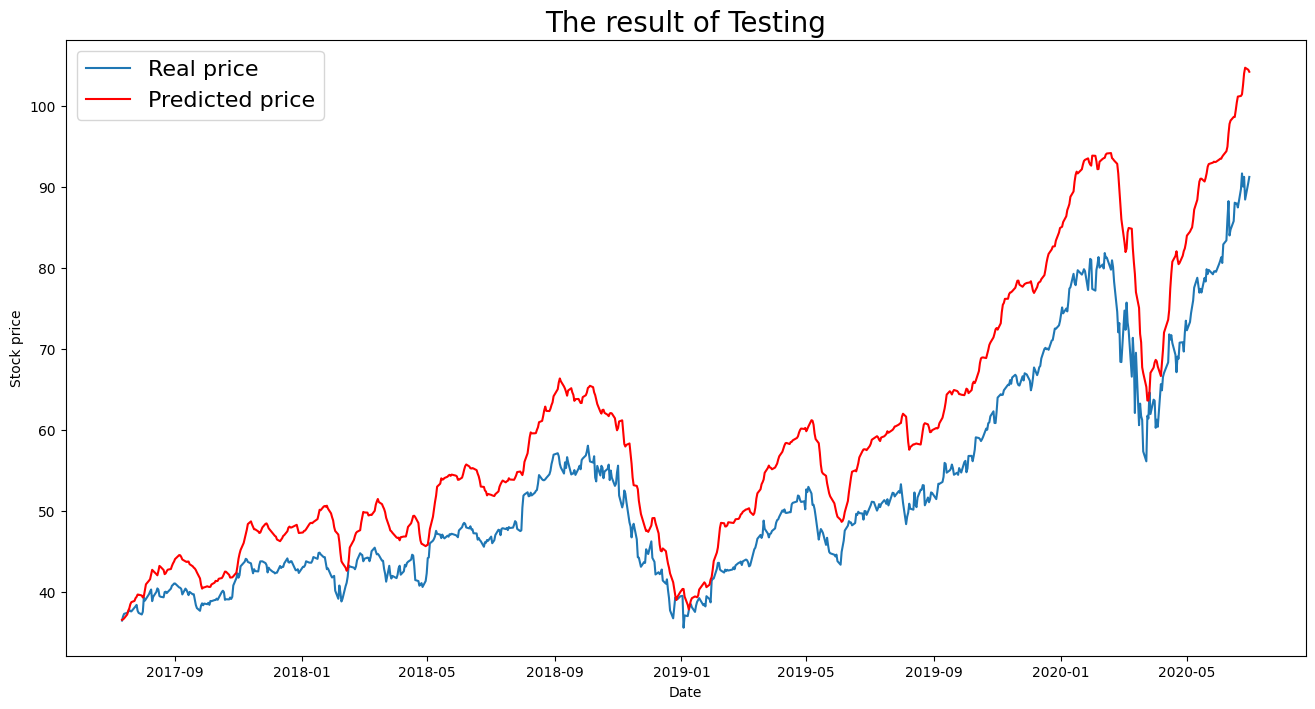

-- Test RMSE -- 7.824836878661115
----- Test RMSE ----- 7.824836878661115


<ipython-input-44-02c2535b320d>:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-44-02c2535b320d>:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


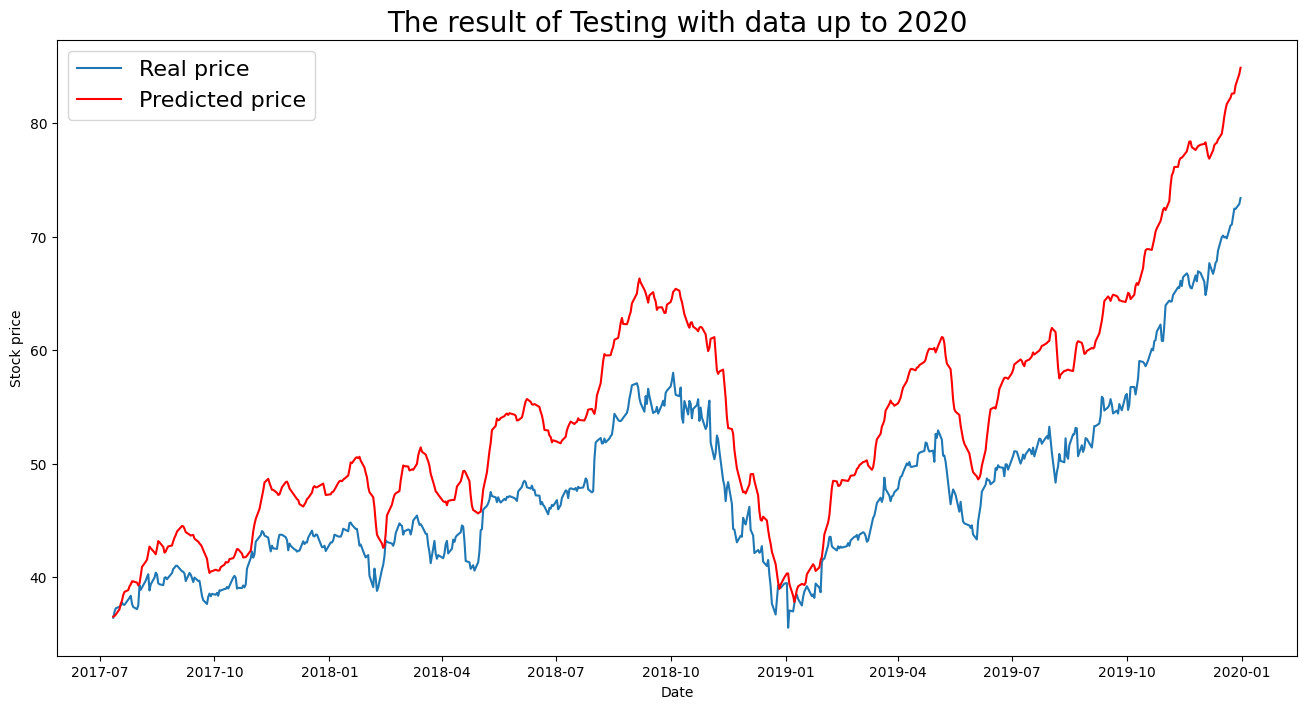

-- Test RMSE with data up to 2020 -- 6.727880006885463
----- Test RMSE with data up to 2020 ----- 6.727880006885463


In [ ]:
# Define file paths
X_scaler_path = 'X_scaler.pkl'
y_scaler_path = 'y_scaler.pkl'
train_index_path = 'index_train.npy'
test_index_path = 'index_test.npy'

# Train plot
train_RMSE = plot_traindataset_result(
    Predicted_price, Real_price, X_scaler_path, y_scaler_path, train_index_path, output_dim
)
print("----- Train RMSE -----", train_RMSE)

# Test plot
test_RMSE = plot_testdataset_result(
    gan.generator, X_test, y_test, yc_test, y_scaler_path, test_index_path
)
print("----- Test RMSE -----", test_RMSE)

# Test plot with 2020 filter
test_with2020_RMSE = plot_testdataset_with2020_result(
    gan.generator, X_test, y_test, yc_test, y_scaler_path, test_index_path
)
print("----- Test RMSE with data up to 2020 -----", test_with2020_RMSE)


<ipython-input-48-f96eb03c81db>:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predict_result['predicted_mean'] = predict_result.mean(axis=1)
<ipython-input-48-f96eb03c81db>:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_price['real_mean'] = real_price.mean(axis=1)


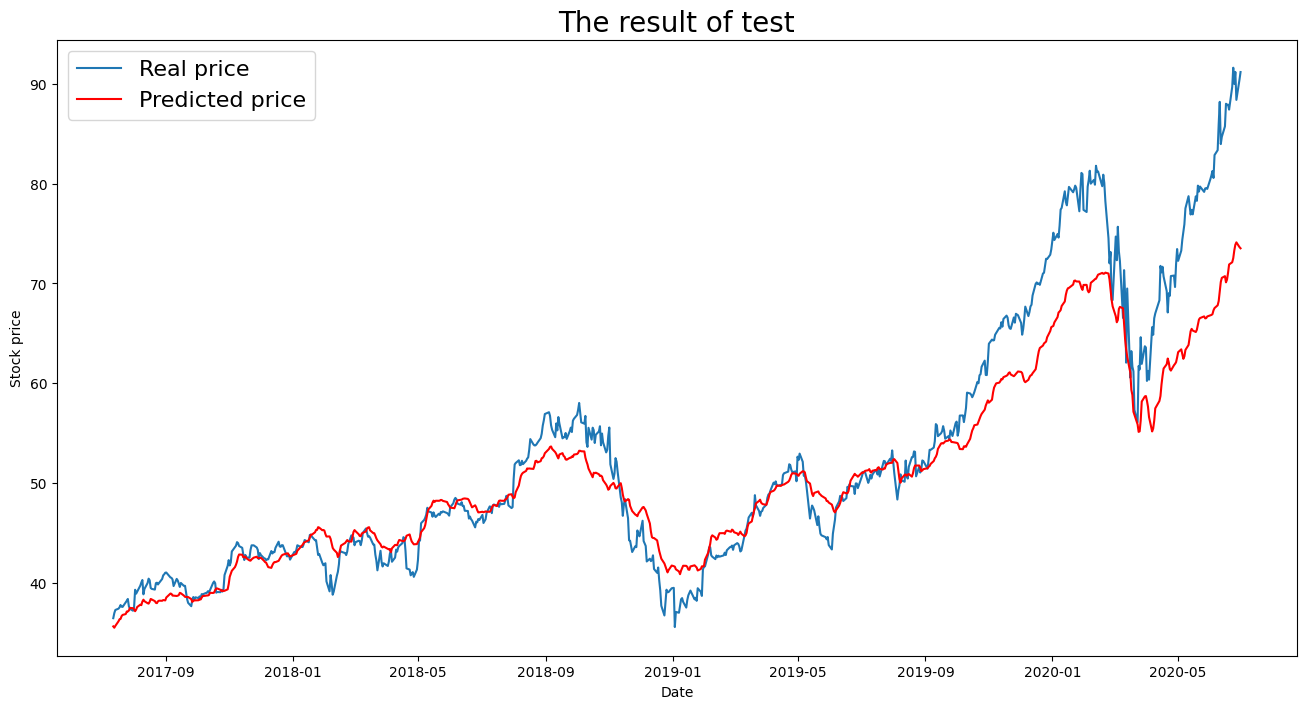

-- RMSE --  4.970685256617441


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from sklearn.metrics import mean_squared_error


########### Test dataset #########

# Load scaler/ index
X_scaler = load(open('X_scaler.pkl', 'rb'))
y_scaler = load(open('y_scaler.pkl', 'rb'))
train_predict_index = np.load("index_train.npy", allow_pickle=True)
test_predict_index = np.load("index_test.npy", allow_pickle=True)

# Load test dataset/ model
G_model = tf.keras.models.load_model('generator_epoch_90.h5')
X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)


def get_test_plot(X_test, y_test):
    # Set output steps
    output_dim = y_test.shape[1]

    # Get predicted data
    y_predicted = G_model(X_test)
    rescaled_real_y = y_scaler.inverse_transform(y_test)
    rescaled_predicted_y = y_scaler.inverse_transform(y_predicted)

    ## Predicted price
    predict_result = pd.DataFrame()
    for i in range(rescaled_predicted_y.shape[0]):
        y_predict = pd.DataFrame(rescaled_predicted_y[i], columns=["predicted_price"],
                                 index=test_predict_index[i:i + output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)

    ## Real price
    real_price = pd.DataFrame()
    for i in range(rescaled_real_y.shape[0]):
        y_train = pd.DataFrame(rescaled_real_y[i], columns=["real_price"], index=test_predict_index[i:i + output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)

    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    #drop 2020
    # Input_Before = '2020-01-01'
    # predict_result = predict_result.loc[predict_result.index < Input_Before]
    # real_price = real_price.loc[real_price.index < Input_Before]

    # Plot the predicted result
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color='r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of test", fontsize=20)
    plt.show()
    plt.savefig('test_plot.png')
    # Calculate RMSE
    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis=1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- RMSE -- ', RMSE)

    return predict_result, RMSE


test_predicted, test_RMSE = get_test_plot(X_test, y_test)
test_predicted.to_csv("test_predicted.csv")